In [ ]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
csv = "GDL_2019_summary.CSV"
df = pd.read_csv(csv,encoding='latin-1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163604 entries, 0 to 1163603
Data columns (total 17 columns):
FECHA              1163604 non-null object
HORA               1163604 non-null int64
air_station        1163604 non-null object
bike_station_id    1163604 non-null int64
trips              1163604 non-null int64
trip_distance      1163604 non-null float64
trip_duration      1163604 non-null float64
CO                 883299 non-null float64
NO                 622724 non-null float64
NO2                627028 non-null float64
NOX                627112 non-null float64
O3                 715470 non-null float64
PM 2.5             3456 non-null float64
PM10               681353 non-null float64
SO2                699370 non-null float64
estacion           883299 non-null object
CO_MEAN            883299 non-null float64
dtypes: float64(11), int64(3), object(3)
memory usage: 150.9+ MB


In [ ]:
df.describe()

HORA  bike_station_id         trips  trip_distance  \
count  1.163604e+06     1.163604e+06  1.163604e+06   1.163604e+06   
mean   1.424578e+01     1.421220e+02  3.958481e+00   7.518556e+03   
std    4.814280e+00     8.925700e+01  4.064948e+00   8.727936e+03   
min    0.000000e+00     2.000000e+00  1.000000e+00   0.000000e+00   
25%    1.000000e+01     5.800000e+01  1.000000e+00   2.402800e+03   
50%    1.400000e+01     1.530000e+02  3.000000e+00   5.066200e+03   
75%    1.800000e+01     2.190000e+02  5.000000e+00   9.667300e+03   
max    2.300000e+01     2.960000e+02  1.530000e+02   4.784530e+05   

       trip_duration             CO             NO            NO2  \
count   1.163604e+06  883299.000000  622724.000000  627028.000000   
mean    1.921656e+03       0.751670       0.015138       0.014255   
std     3.151870e+05       0.490315       0.022470       0.013927   
min    -1.116267e+08       0.007000       0.000000       0.000000   
25%     8.300000e+02       0.432330       0.004000       0.005000   
50%     1.740000e+03       0.603326       0.009000       0.010000   
75%     3.408000e+03       1.027000       0.014000       0.019000   
max     1.815094e+07       5.722000       0.254000       0.133000   

                 NOX             O3       PM 2.5           PM10  \
count  627112.000000  715470.000000  3456.000000  681353.000000   
mean        0.029279       0.033891    10.808375      36.378339   
std         0.032817       0.021449     4.992803      22.414873   
min         0.000000       0.000000     3.170000       0.000000   
25%         0.012000       0.018000     6.580000      21.750000   
50%         0.018000       0.032000     9.890000      32.160000   
75%         0.031000       0.047000    15.000000      45.600000   
max         0.337000       0.210000    23.070000     442.080000   

                 SO2        CO_MEAN  
count  699370.000000  883299.000000  
mean        0.002764       0.741121  
std         0.001854       0.359970  
min         0.000000       0.266473  
25%         0.001600       0.455636  
50%         0.002100       0.638825  
75%         0.003700       0.897259  
max         0.013500       1.623480

In [ ]:
df.isnull().sum()

FECHA                    0
HORA                     0
air_station              0
bike_station_id          0
trips                    0
trip_distance            0
trip_duration            0
CO                  280305
NO                  540880
NO2                 536576
NOX                 536492
O3                  448134
PM 2.5             1160148
PM10                482251
SO2                 464234
estacion            280305
CO_MEAN             280305
dtype: int64

In [ ]:
df = df[df['CO'].notnull()]

In [ ]:
#df.drop(columns=["FECHA"],inplace=True)

In [ ]:
features = df[['trips', 'trip_distance', 'trip_duration','HORA']]
label = df[['CO']]

In [ ]:
features.head()

trips  trip_distance  trip_duration  HORA
0      1    1112.110197          960.0     0
1      2    5333.400000         1500.0     6
2      3    4216.600000         3900.0     6
3      1    1137.800000          300.0     6
4      3    9786.400000         2820.0     6

In [ ]:
label.head()

CO
0  1.138711
1  3.637000
2  3.637000
3  3.637000
4  3.637000

In [ ]:
#scale numerical features, not the label
scaler = MinMaxScaler()
features[features.columns] = scaler.fit_transform(features[features.columns])

<ipython-input-10-eec10b5288a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[features.columns] = scaler.fit_transform(features[features.columns])
C:\Users\nxa19423\ONEDRI~1\CIM\ML\ml_env\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
features.head()

trips  trip_distance  trip_duration     HORA
0  0.000000       0.002324       0.860146  0.00000
1  0.006579       0.011147       0.860150  0.26087
2  0.013158       0.008813       0.860168  0.26087
3  0.000000       0.002378       0.860140  0.26087
4  0.013158       0.020454       0.860160  0.26087

In [ ]:
data_set = features
data_set['label'] = label
data_set.head()

<ipython-input-12-6eadf0350739>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['label'] = label


trips  trip_distance  trip_duration     HORA     label
0  0.000000       0.002324       0.860146  0.00000  1.138711
1  0.006579       0.011147       0.860150  0.26087  3.637000
2  0.013158       0.008813       0.860168  0.26087  3.637000
3  0.000000       0.002378       0.860140  0.26087  3.637000
4  0.013158       0.020454       0.860160  0.26087  3.637000

In [ ]:
train, test = train_test_split(data_set, test_size=0.2)
test.sort_values(by='trips', ascending=False, inplace=True) #just for visualization purposes
test.head()

<ipython-input-13-f65d31acd34e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.sort_values(by='trips', ascending=False, inplace=True) #just for visualization purposes


trips  trip_distance  trip_duration      HORA     label
346526  1.000000       1.000000       0.922042  0.782609  0.176000
136726  0.723684       0.709847       0.860866  0.782609  0.361309
656586  0.651316       0.684696       0.860830  0.782609  0.361309
136978  0.625000       0.636363       0.860789  0.826087  0.432330
552974  0.585526       0.612098       0.860736  0.782609  0.361309

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train.drop('label', axis=1), train['label'])

# Make predictions using the testing set
y_pred = regr.predict(test.drop('label', axis=1))

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test['label'], y_pred)) #y_hat
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test['label'], y_pred))

Coefficients: 
 [ 2.3982865  -2.35084315  2.36923443 -0.44467765]
Mean squared error: 0.23
Coefficient of determination: 0.04


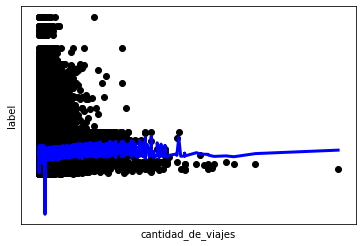

In [ ]:
# Plot outputs
plt.scatter(test['trips'], test['label'],  color='black')
plt.plot(test['trips'], y_pred , color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('cantidad_de_viajes')
plt.ylabel('label')
plt.show()

In [ ]:
test = test.sort_index(axis = 0) 

In [ ]:
#new prediction
y_pred = regr.predict(test.drop('label', axis=1))

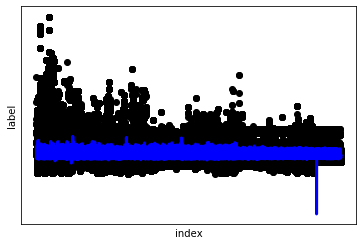

In [ ]:
# Plot outputs
plt.scatter(test.index, test['label'],  color='black')
plt.plot(test.index, y_pred , color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('index')
plt.ylabel('label')
plt.show()

----------------------------------------------------LinearRegression----------------------------------------------------
Coefficients: 
 [ 2.3982865  -2.35084315  2.36923443 -0.44467765]
Mean squared error: 0.23161
Coefficient of determination: 0.04075


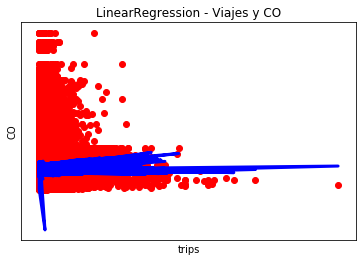

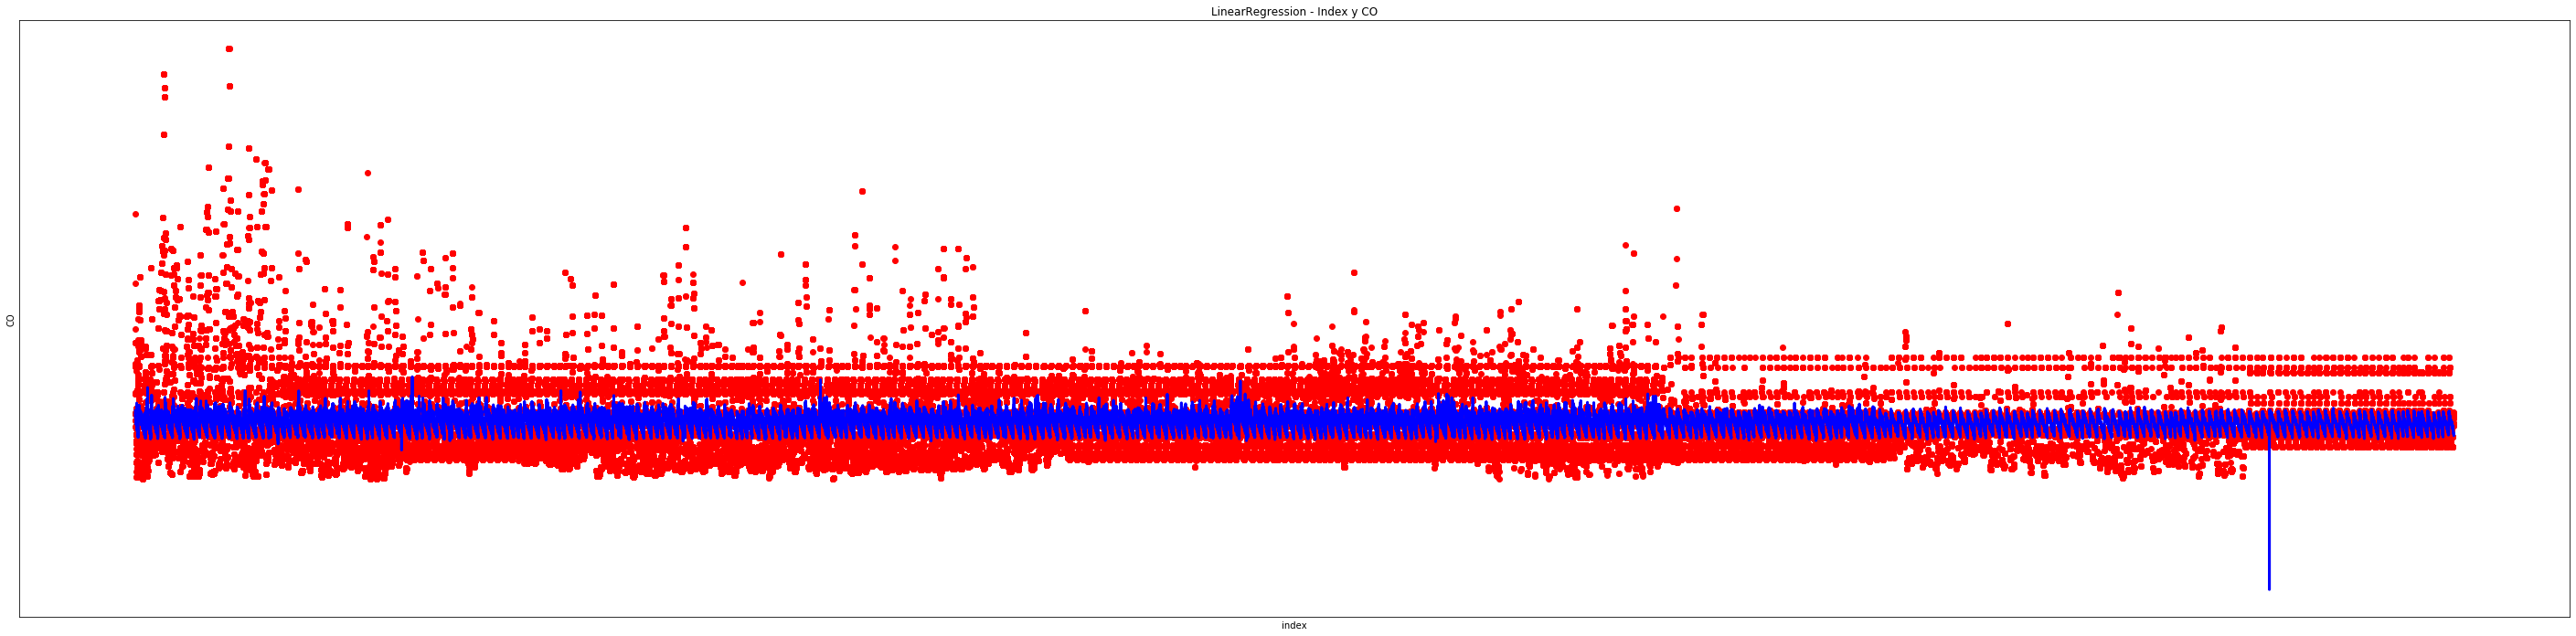

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
Mean squared error: 0.30071
Coefficient of determination: -0.24546


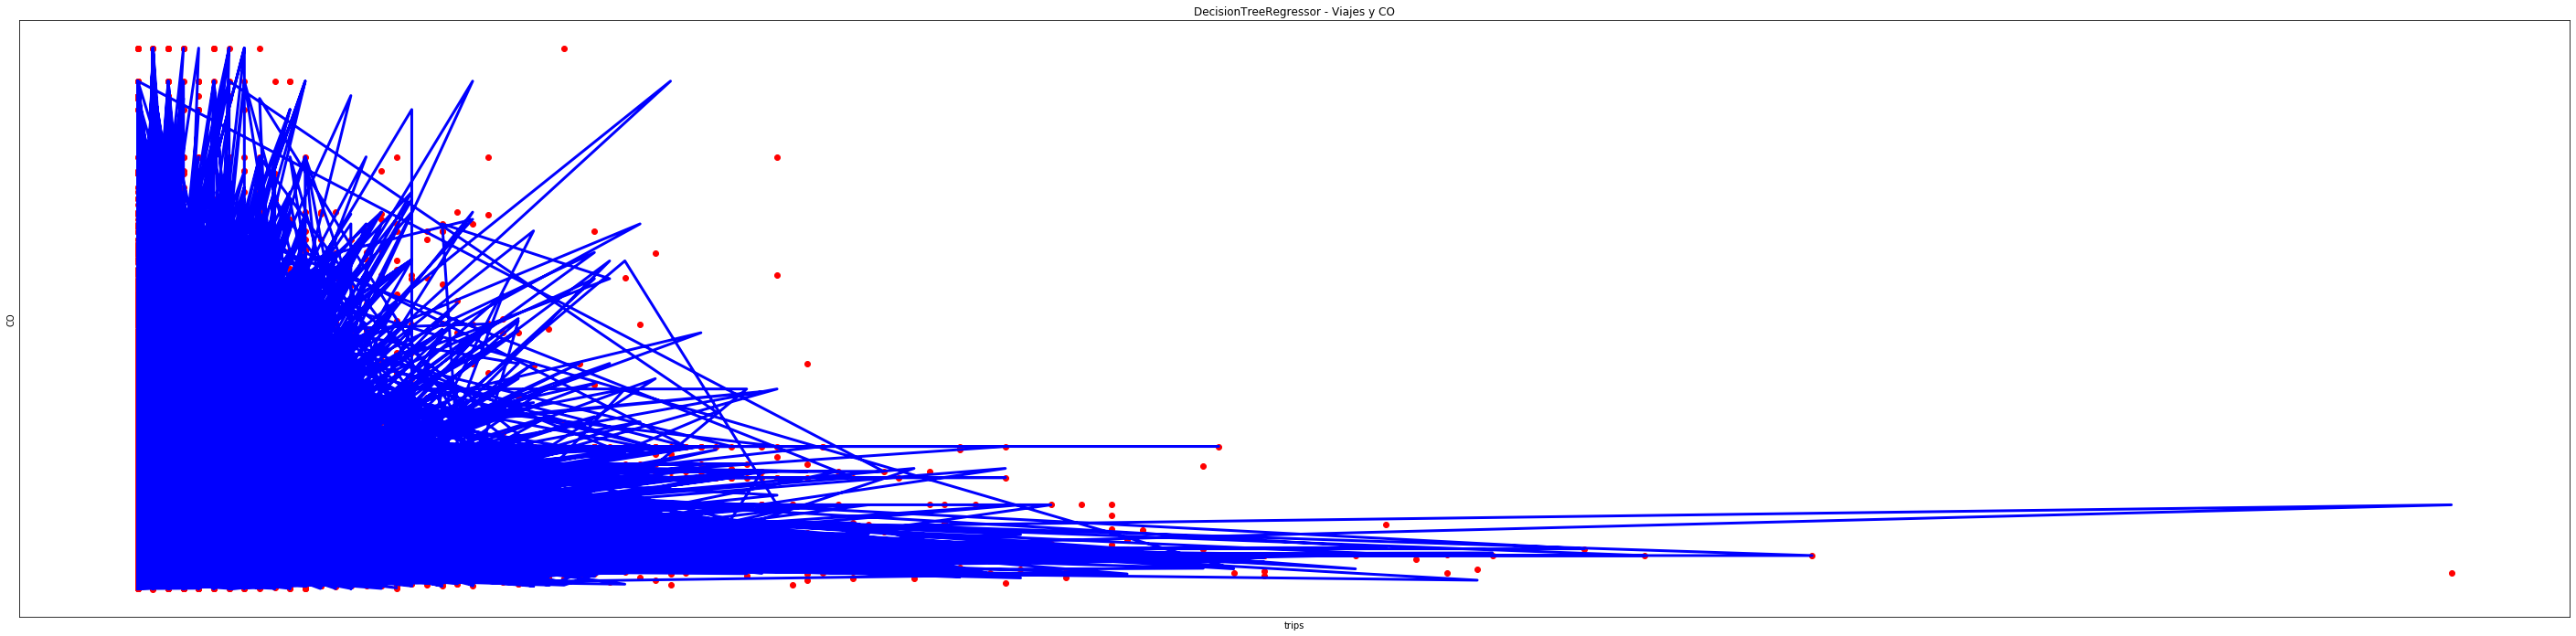

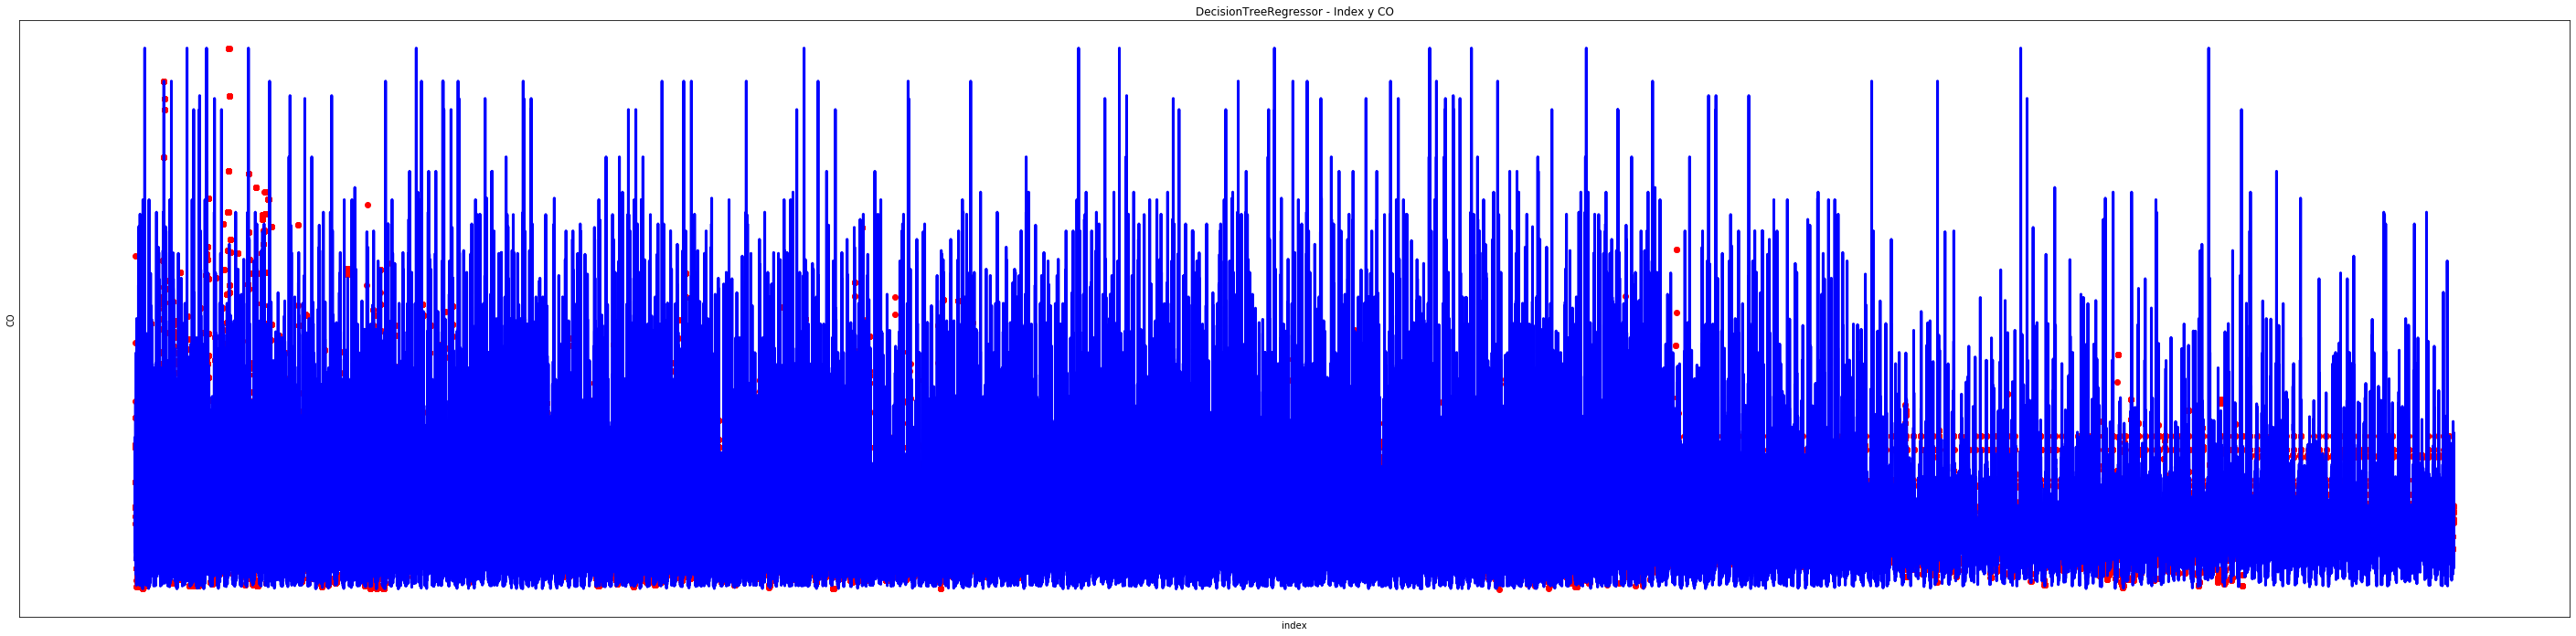

----------------------------------------------------MLPRegressor----------------------------------------------------
Mean squared error: 0.15881
Coefficient of determination: 0.34226


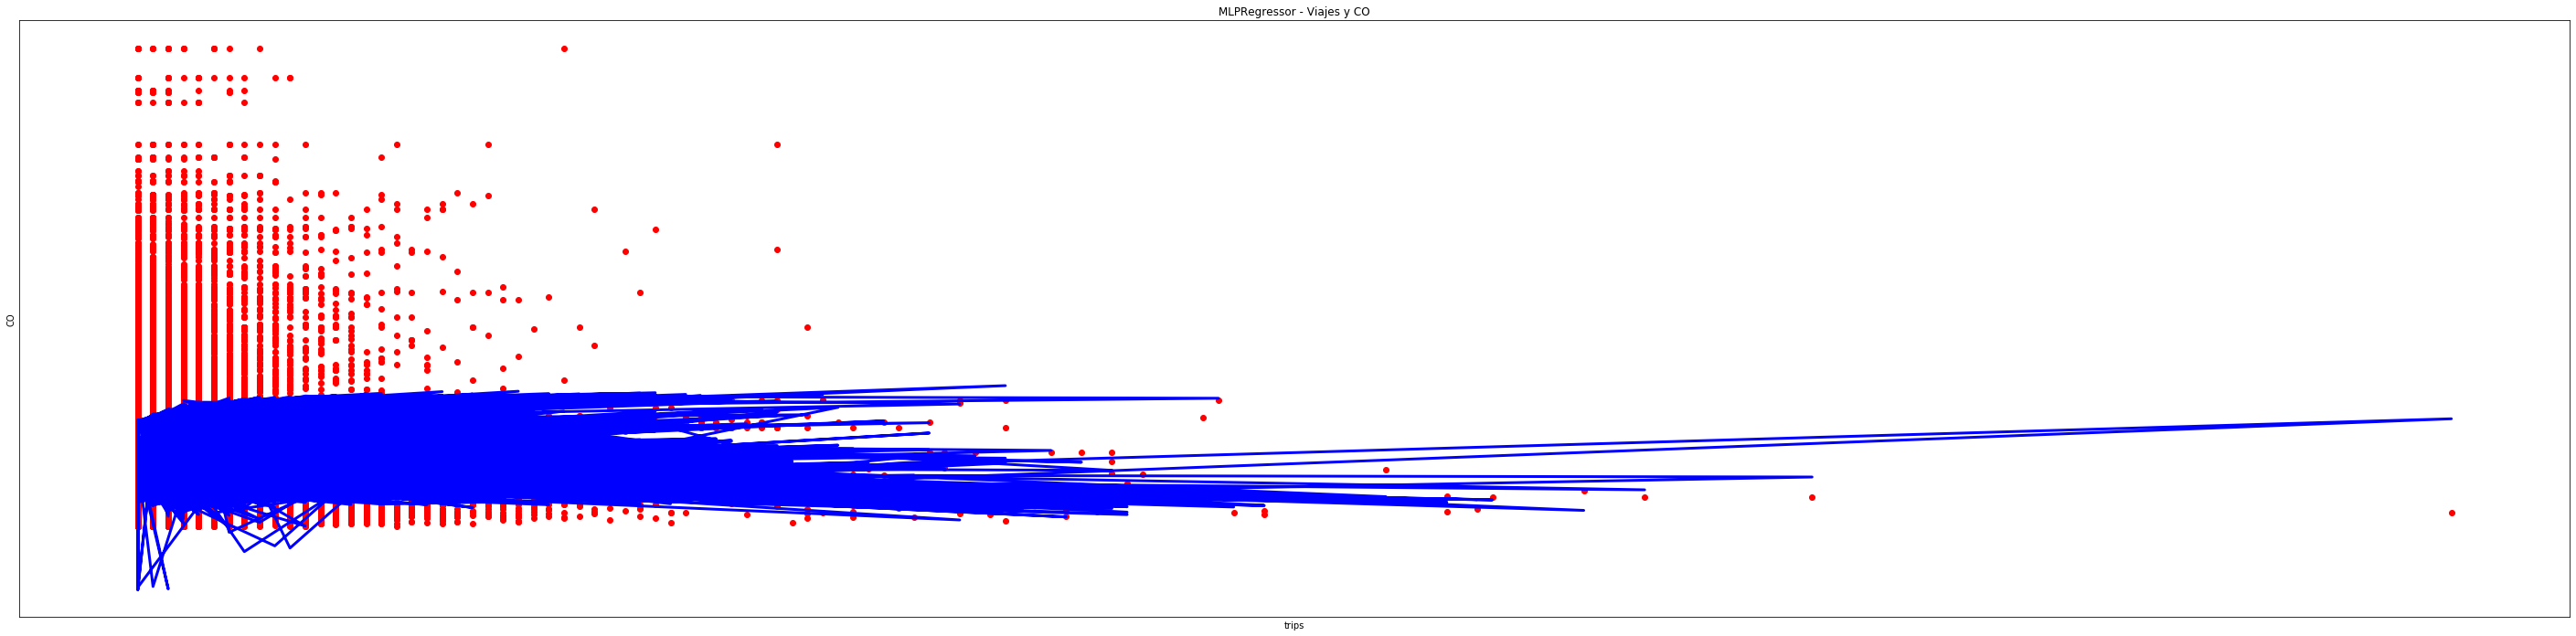

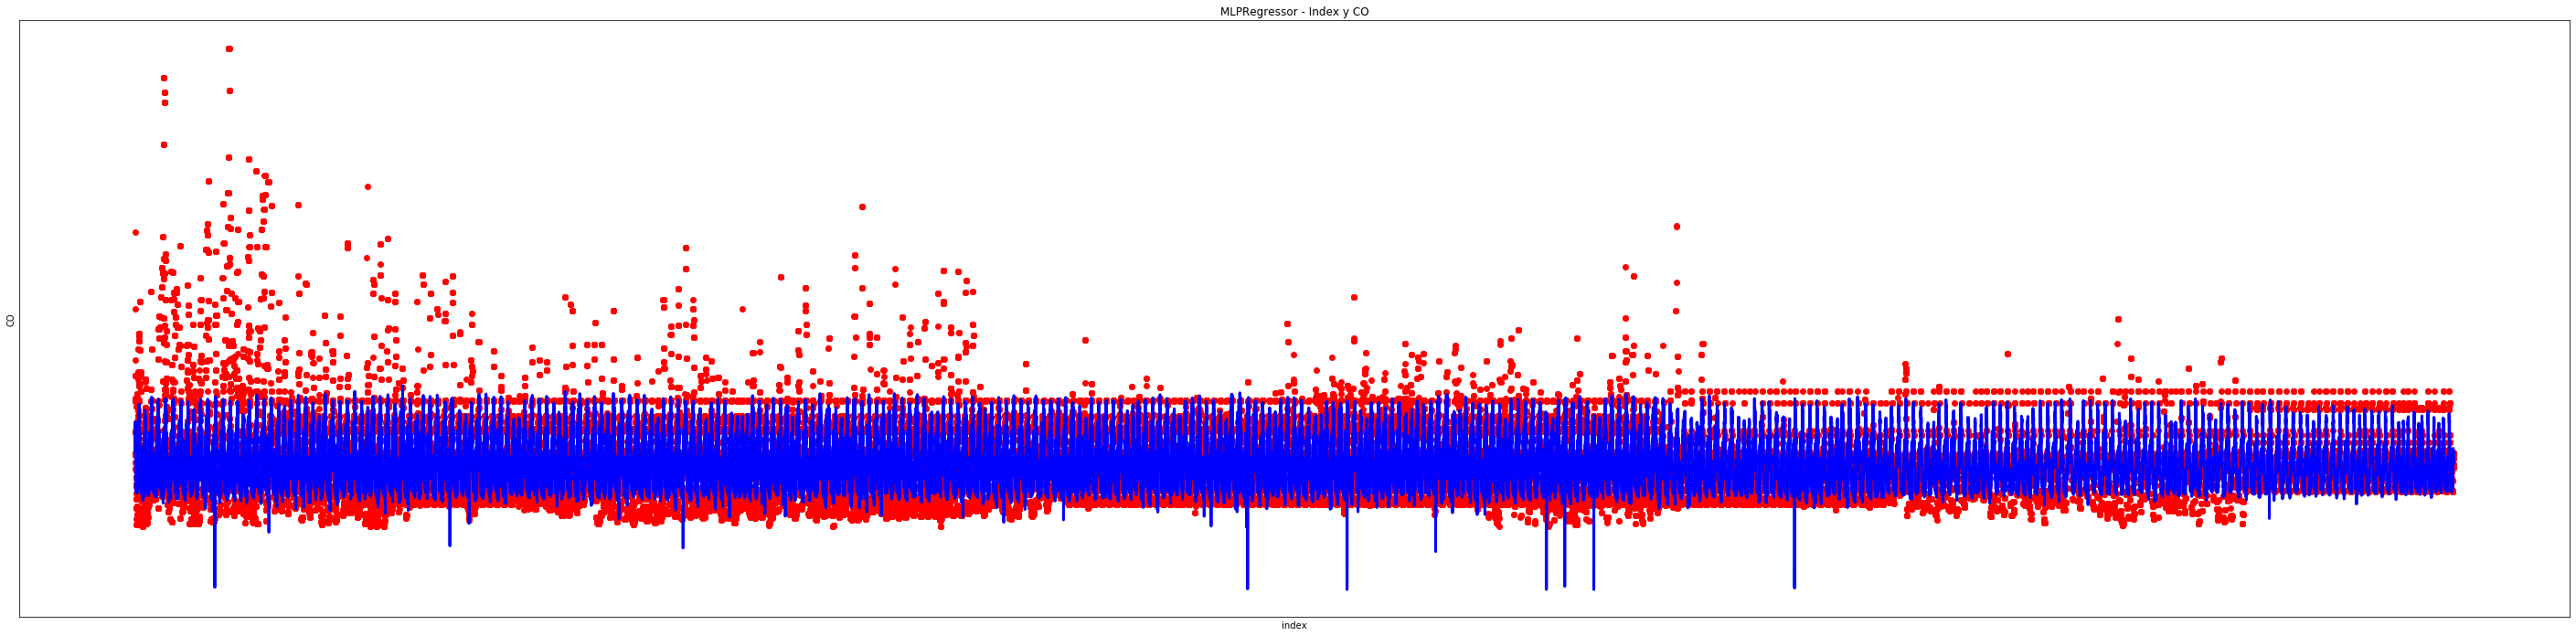

In [ ]:
models = []
models.append(('LinearRegression', linear_model.LinearRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor(random_state=0)))
models.append(('MLPRegressor', MLPRegressor(random_state=1, max_iter=500)))
results = []
names = []
for name, model in models:
    model.fit(train.drop('label', axis=1), train['label'])
    y_pred = model.predict(test.drop('label', axis=1))

    print(f'----------------------------------------------------{name}----------------------------------------------------')
    if(name == 'LinearRegression'):
      print('Coefficients: \n', regr.coef_)
    print('Mean squared error: %.5f'
          % mean_squared_error(test['label'], y_pred))
    print('Coefficient of determination: %.5f'
          % r2_score(test['label'], y_pred))
    plt.scatter(test['trips'], test['label'],  color='red')
    plt.plot(test['trips'], y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('trips')
    plt.ylabel('CO')
    plt.title(name + ' - Viajes y CO')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

    test = test.sort_index(axis = 0) 
    y_pred = model.predict(test.drop('label', axis=1))
    # Plot outputs
    plt.scatter(test.index, test['label'],  color='red')
    plt.plot(test.index, y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('index')
    plt.ylabel('CO')
    plt.title(name + ' - Index y CO')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

In [ ]:
#Get top 5 stations
df_station = df.bike_station_id.value_counts().rename_axis('bike_station_id').reset_index(name='counts')
df_station.sort_values(by='counts', ascending=False, inplace=True)
df_station.head(5)

bike_station_id  counts
0              157    5766
1              165    5409
2              161    5342
3              249    5339
4              266    5242

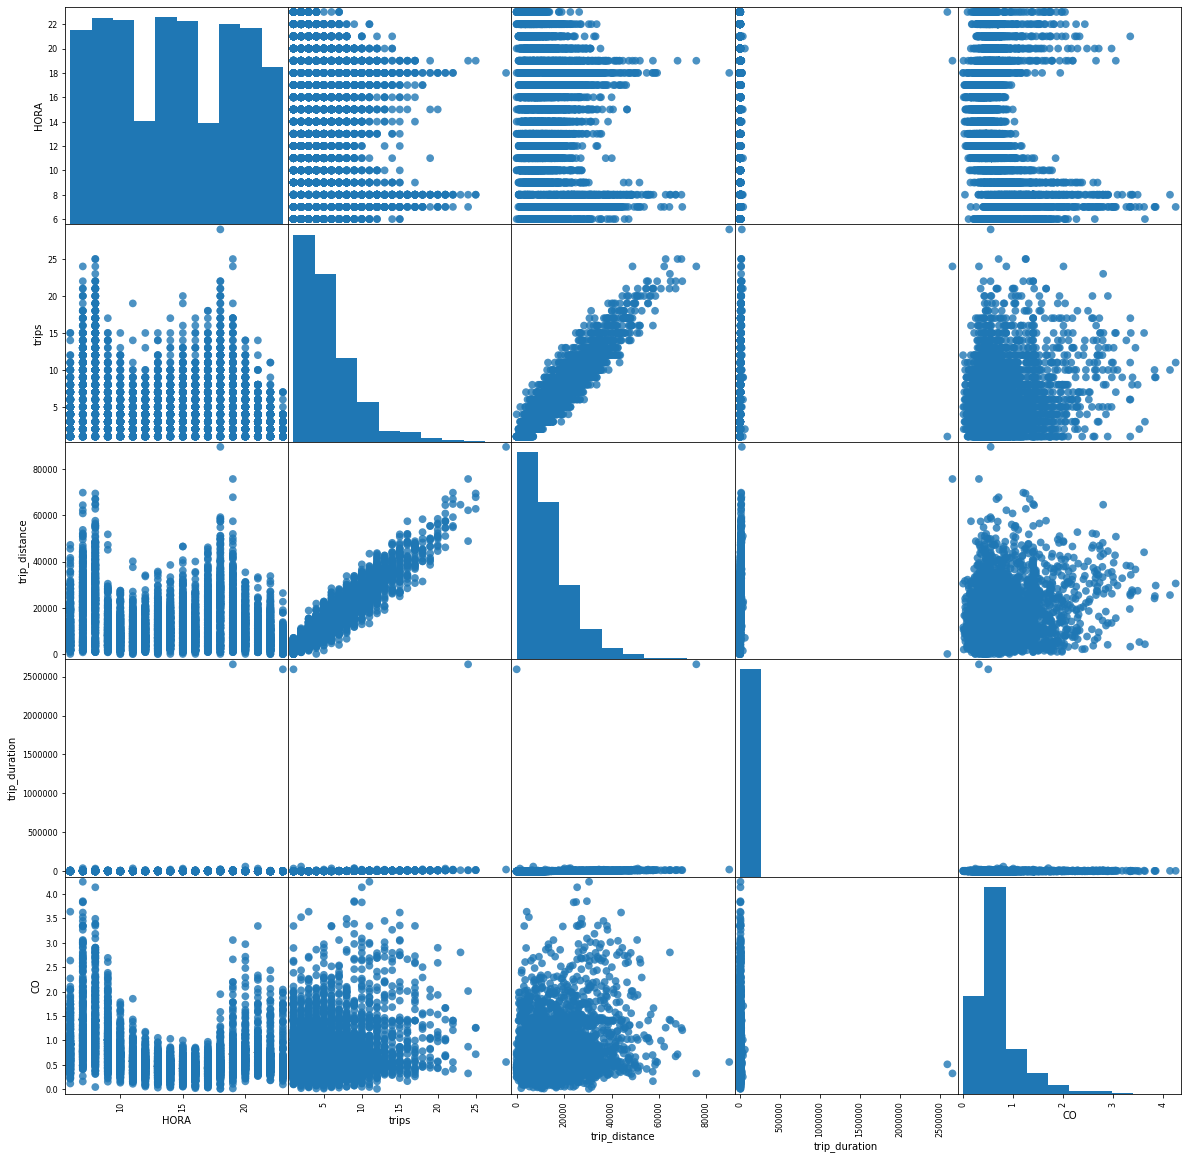

In [ ]:
# bike_station_id 157
df_top1 = df.query('bike_station_id == 157')
df_top1 = df_top1[['HORA', 'trips', 'trip_distance', 'trip_duration', 'CO']]
pd.plotting.scatter_matrix(df_top1, figsize=(20,20), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)
plt.show()

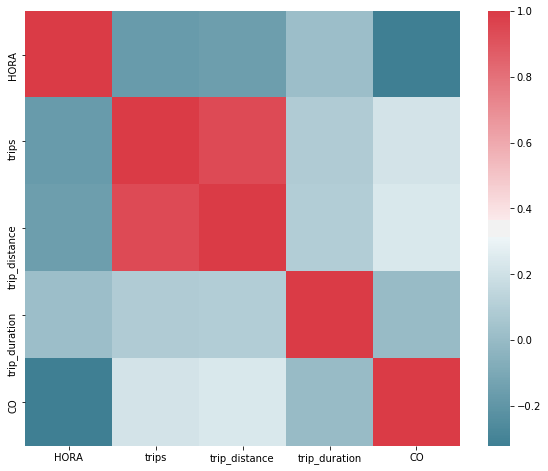

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_top1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

<ipython-input-24-b6872b9b449c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_top1.sort_values(by='trips', ascending=True, inplace=True)


----------------------------------------------------LinearRegression----------------------------------------------------
Coefficients: 
 [ 2.3982865  -2.35084315  2.36923443 -0.44467765]
Mean squared error: 0.17669
Coefficient of determination: 0.16642


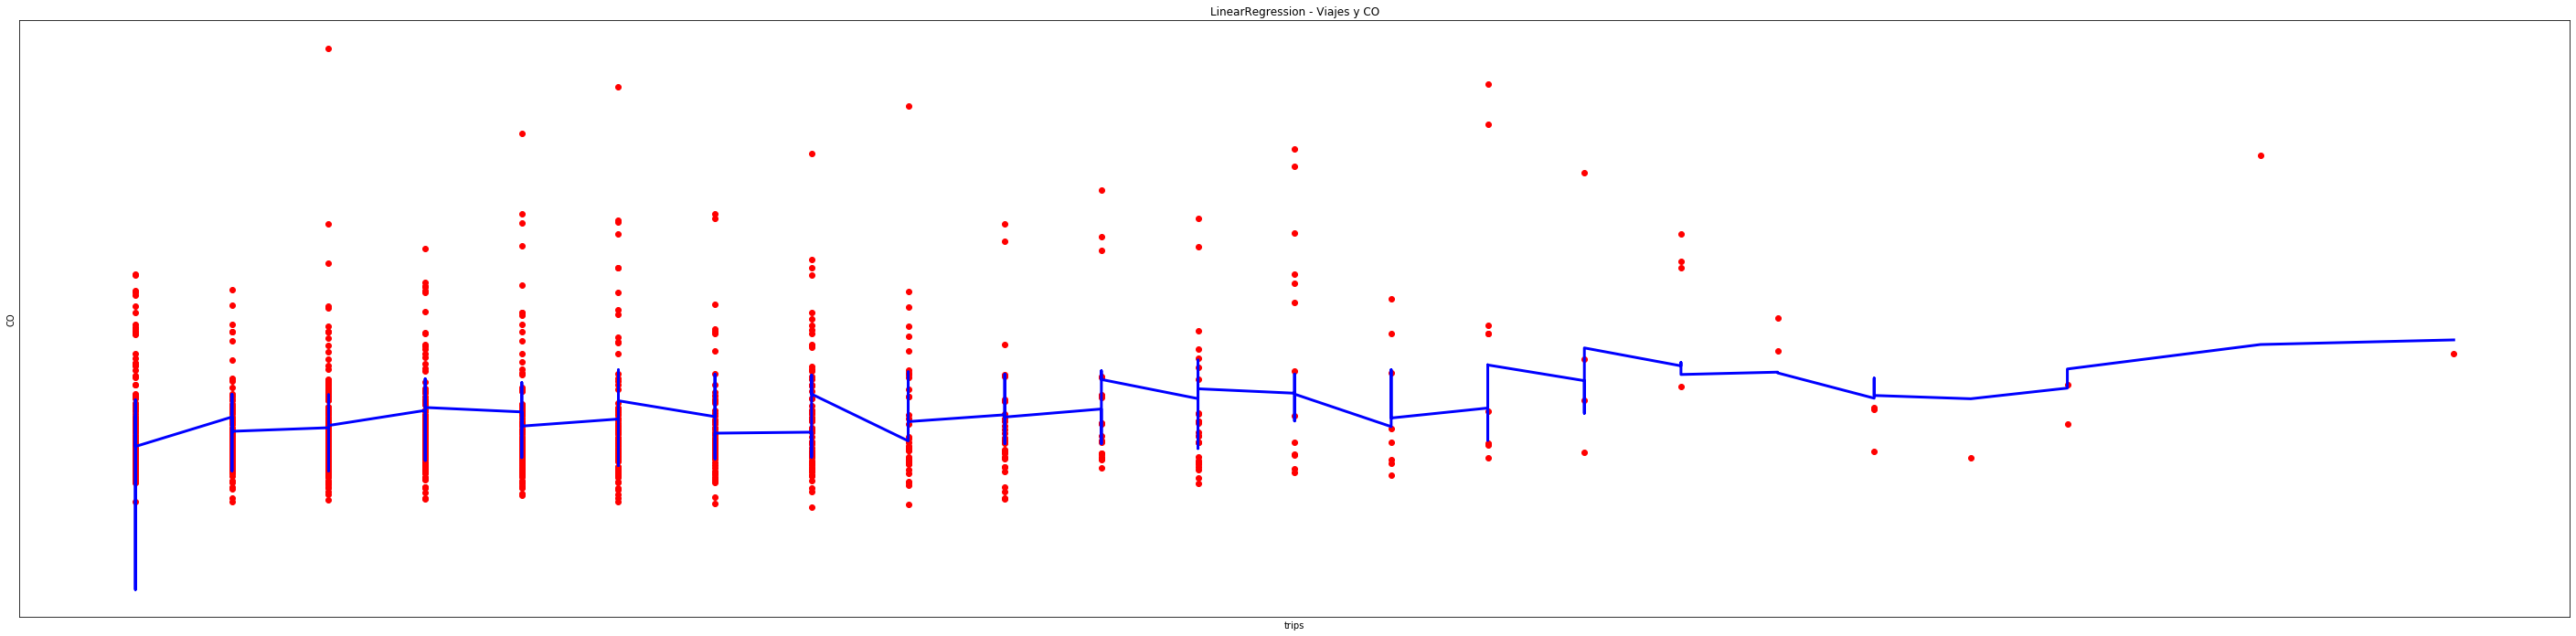

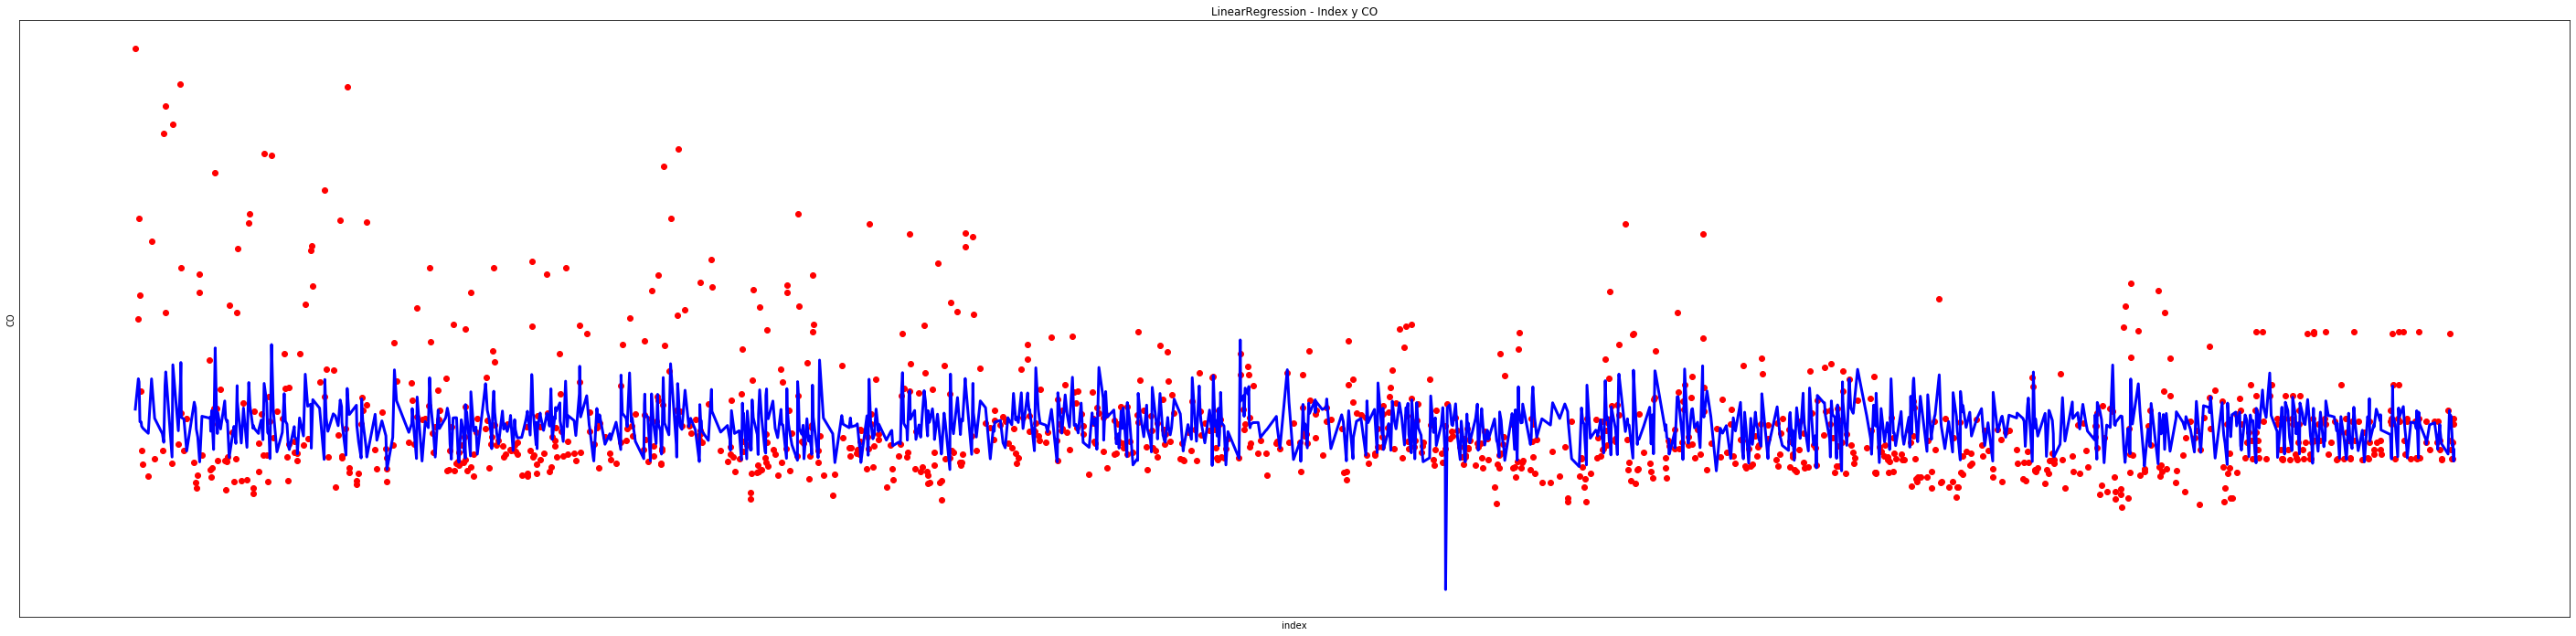

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
Mean squared error: 0.24122
Coefficient of determination: -0.13801


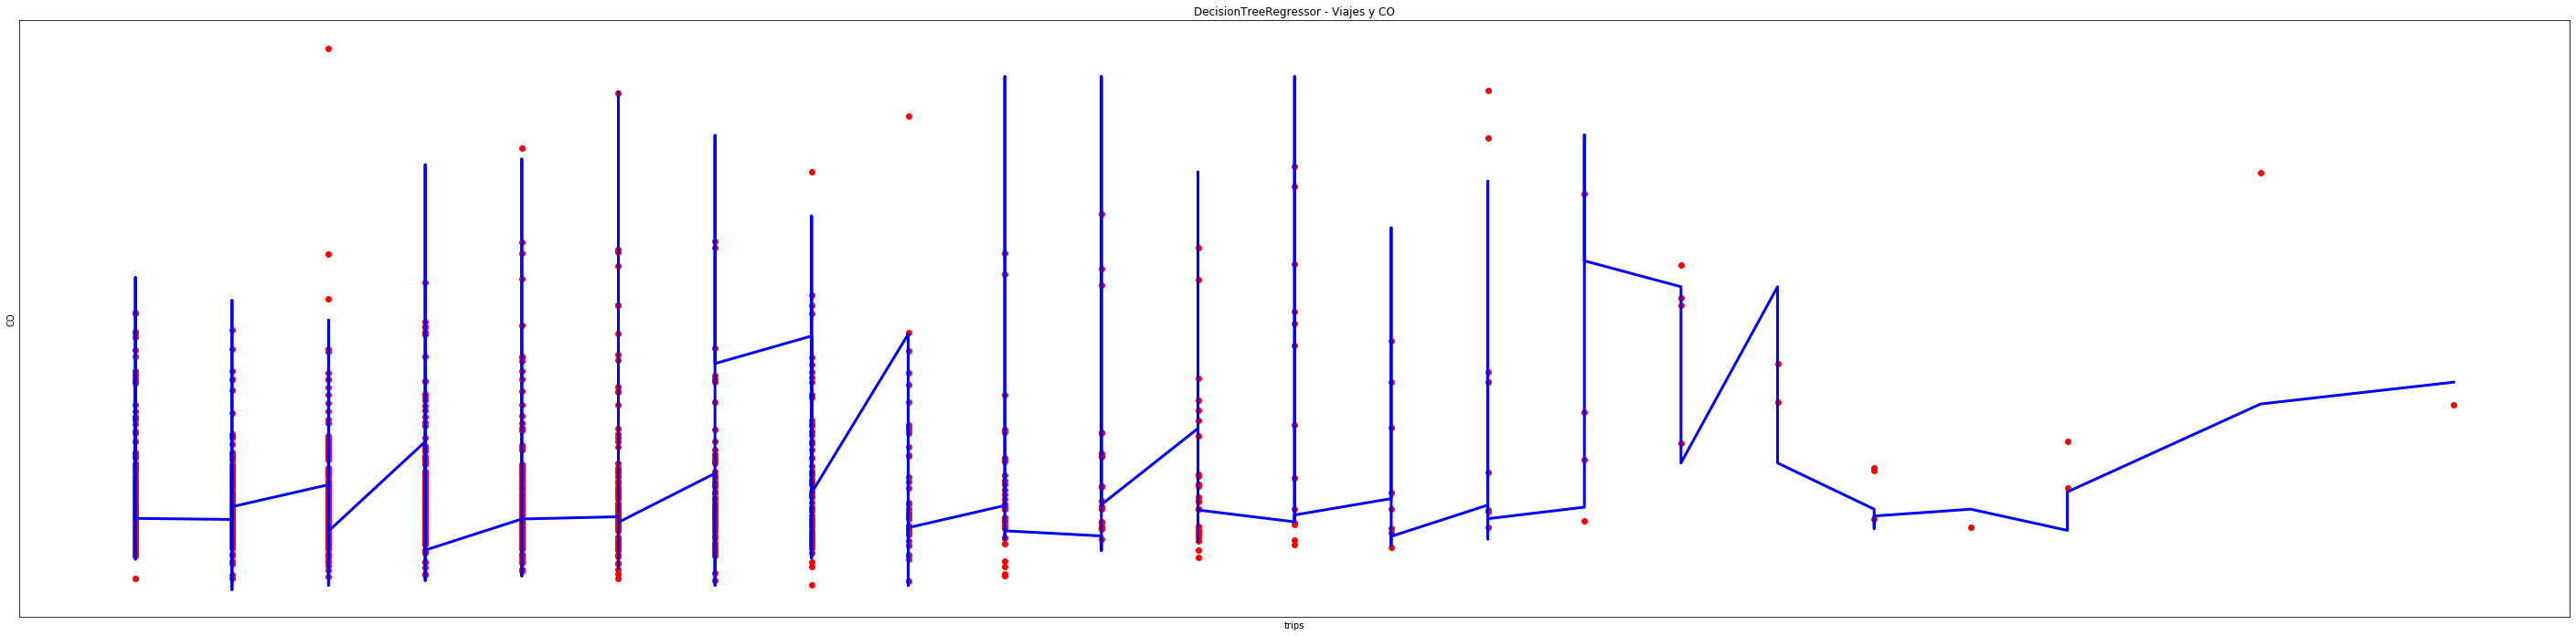

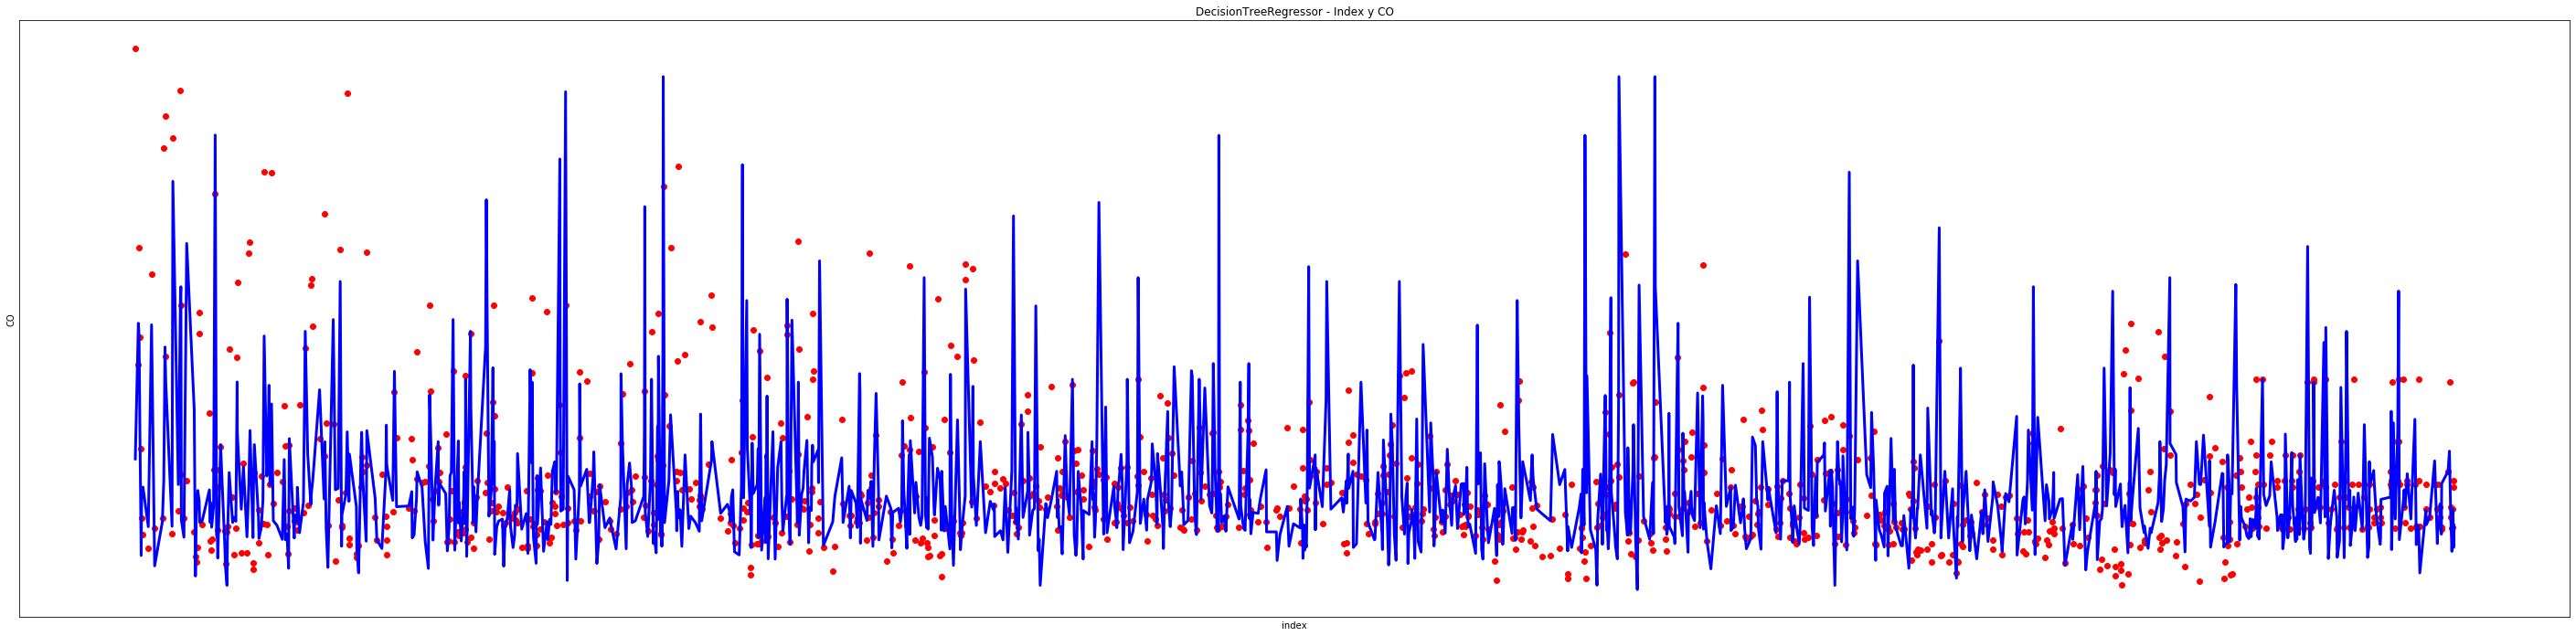

----------------------------------------------------MLPRegressor----------------------------------------------------
Mean squared error: 1990254.79664
Coefficient of determination: -9389326.39370


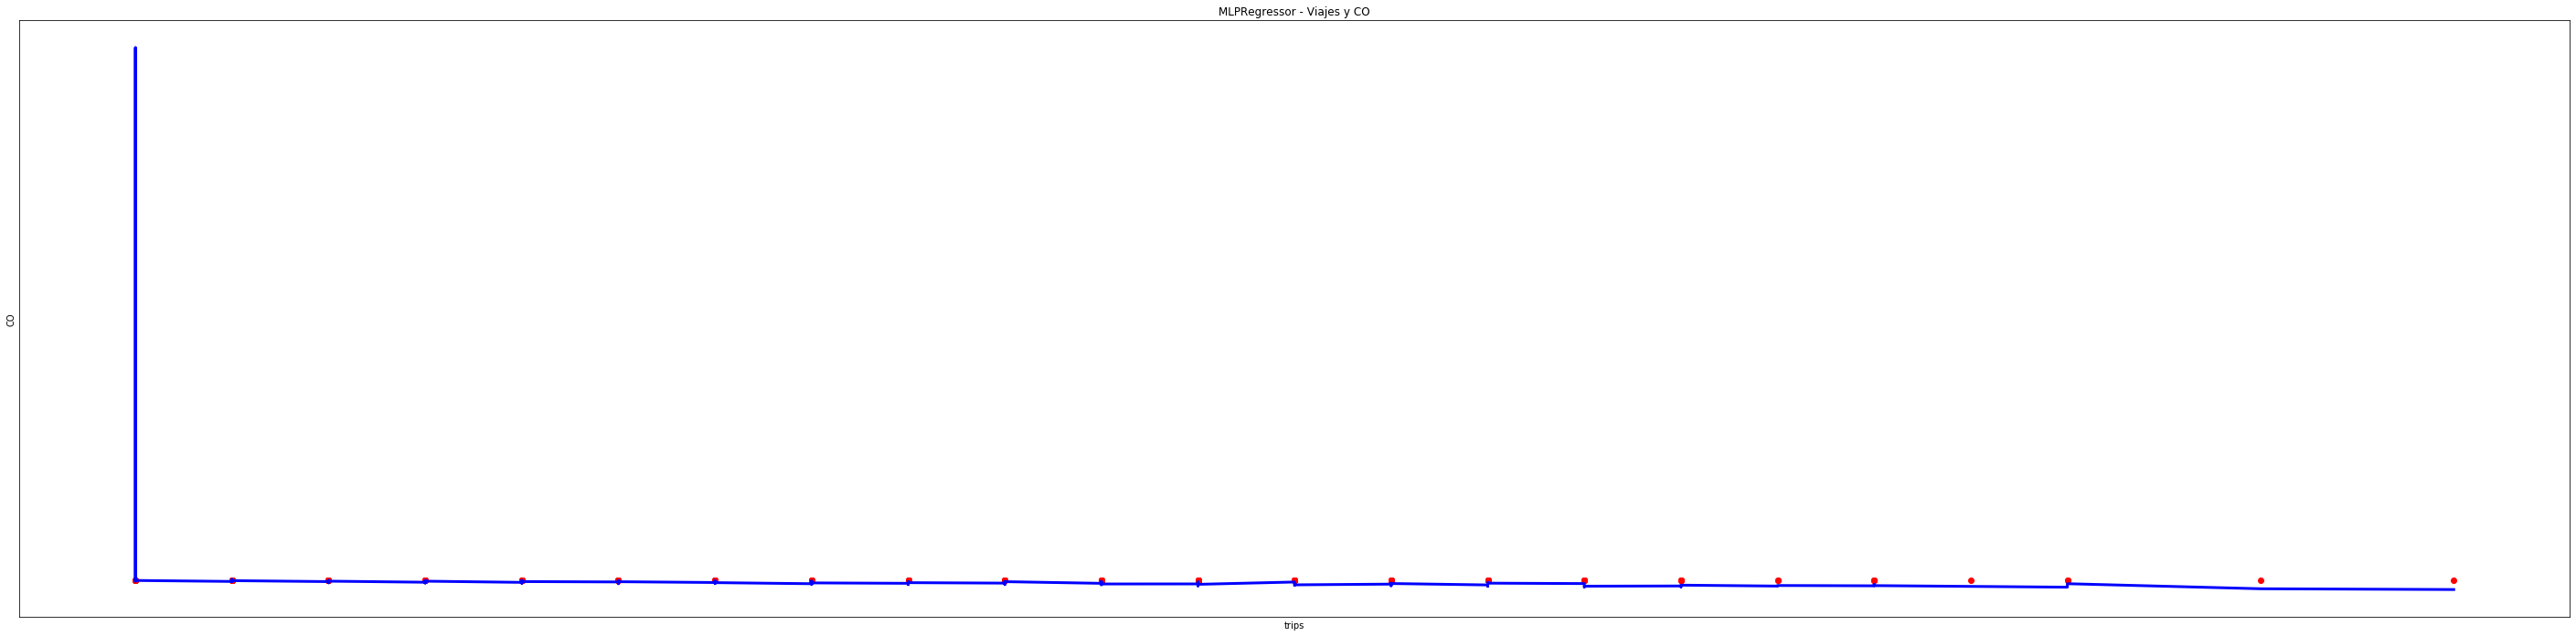

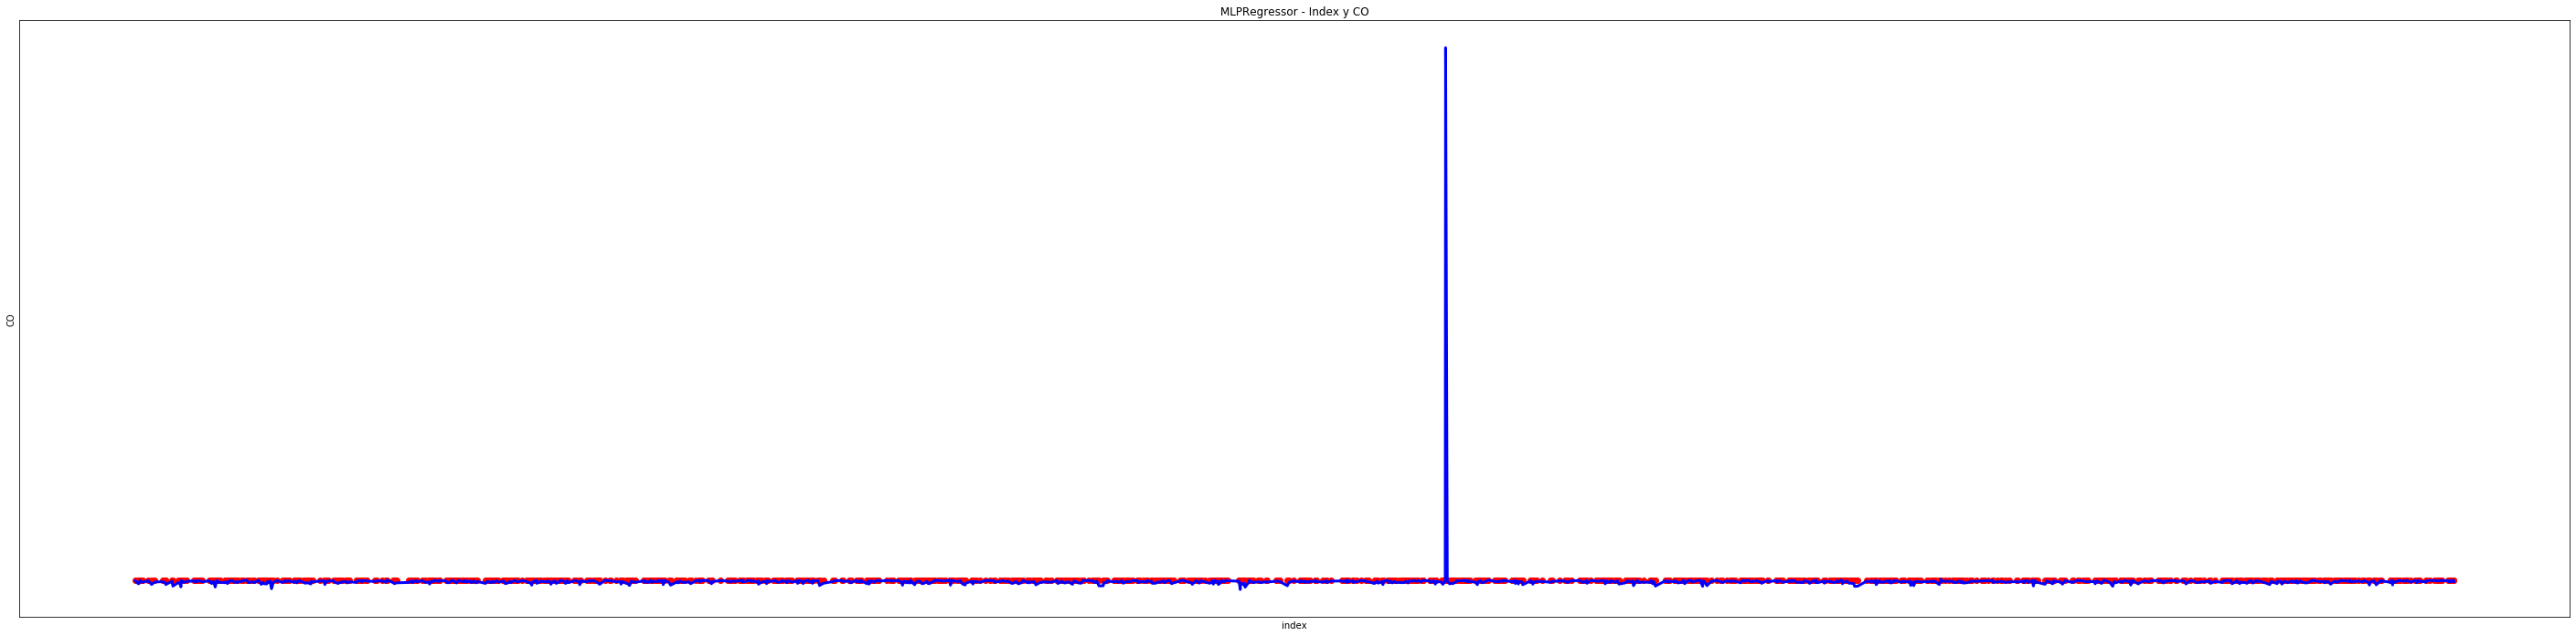

In [ ]:
train_top1, test_top1 = train_test_split(df_top1, test_size=0.2)

models_top1 = []
models_top1.append(('LinearRegression', linear_model.LinearRegression()))
models_top1.append(('DecisionTreeRegressor', DecisionTreeRegressor(random_state=0)))
models_top1.append(('MLPRegressor', MLPRegressor(random_state=1, max_iter=500)))
results = []
names = []
for name, model in models_top1:
    test_top1.sort_values(by='trips', ascending=True, inplace=True)
    model.fit(train_top1.drop('CO', axis=1), train_top1['CO'])
    y_pred = model.predict(test_top1.drop('CO', axis=1))

    print(f'----------------------------------------------------{name}----------------------------------------------------')
    if(name == 'LinearRegression'):
      print('Coefficients: \n', regr.coef_)
    print('Mean squared error: %.5f'
          % mean_squared_error(test_top1['CO'], y_pred))
    print('Coefficient of determination: %.5f'
          % r2_score(test_top1['CO'], y_pred))
    
    plt.scatter(test_top1['trips'], test_top1['CO'],  color='red')
    plt.plot(test_top1['trips'], y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('trips')
    plt.ylabel('CO')
    plt.title(name + ' - Viajes y CO')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

    test_top1 = test_top1.sort_index(axis = 0) 
    y_pred = model.predict(test_top1.drop('CO', axis=1))
    # Plot outputs
    plt.scatter(test_top1.index, test_top1['CO'],  color='red')
    plt.plot(test_top1.index, y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('index')
    plt.ylabel('CO')
    plt.title(name + ' - Index y CO')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

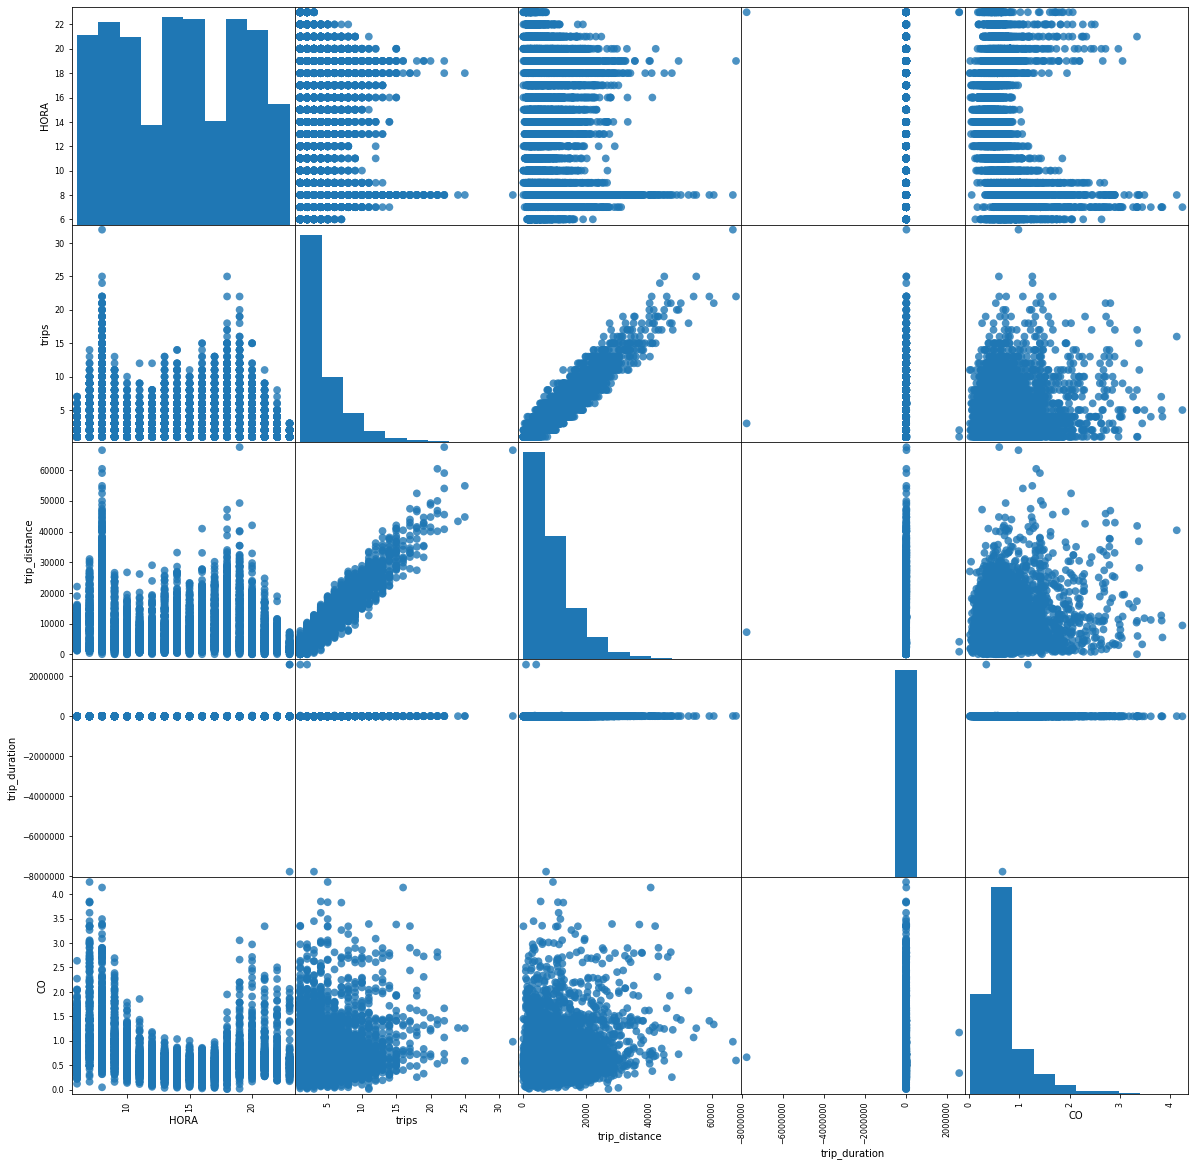

In [ ]:
# bike_station_id top2
df_top2 = df.query('bike_station_id == 165')
df_top2 = df_top2[['HORA', 'trips', 'trip_distance', 'trip_duration', 'CO']]
pd.plotting.scatter_matrix(df_top2, figsize=(20,20), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)
plt.show()

<ipython-input-26-3a254156d5f8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_top2.sort_values(by='trips', ascending=True, inplace=True)


----------------------------------------------------LinearRegression----------------------------------------------------
Coefficients: 
 [ 2.3982865  -2.35084315  2.36923443 -0.44467765]
Mean squared error: 0.16144
Coefficient of determination: 0.13320


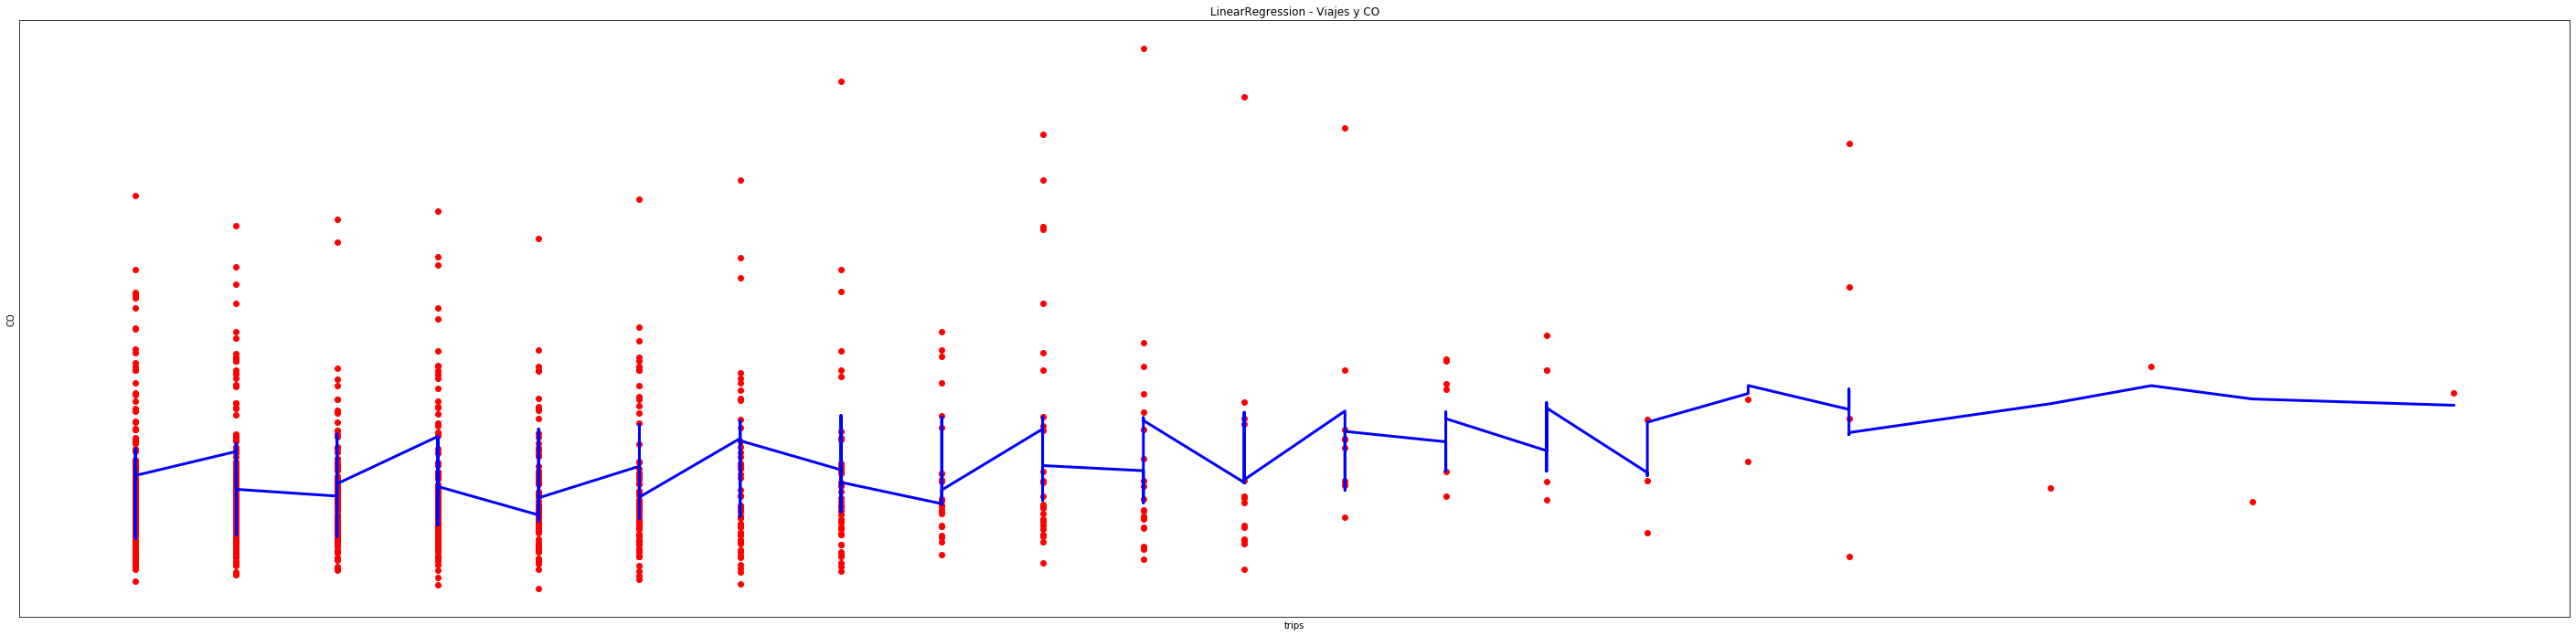

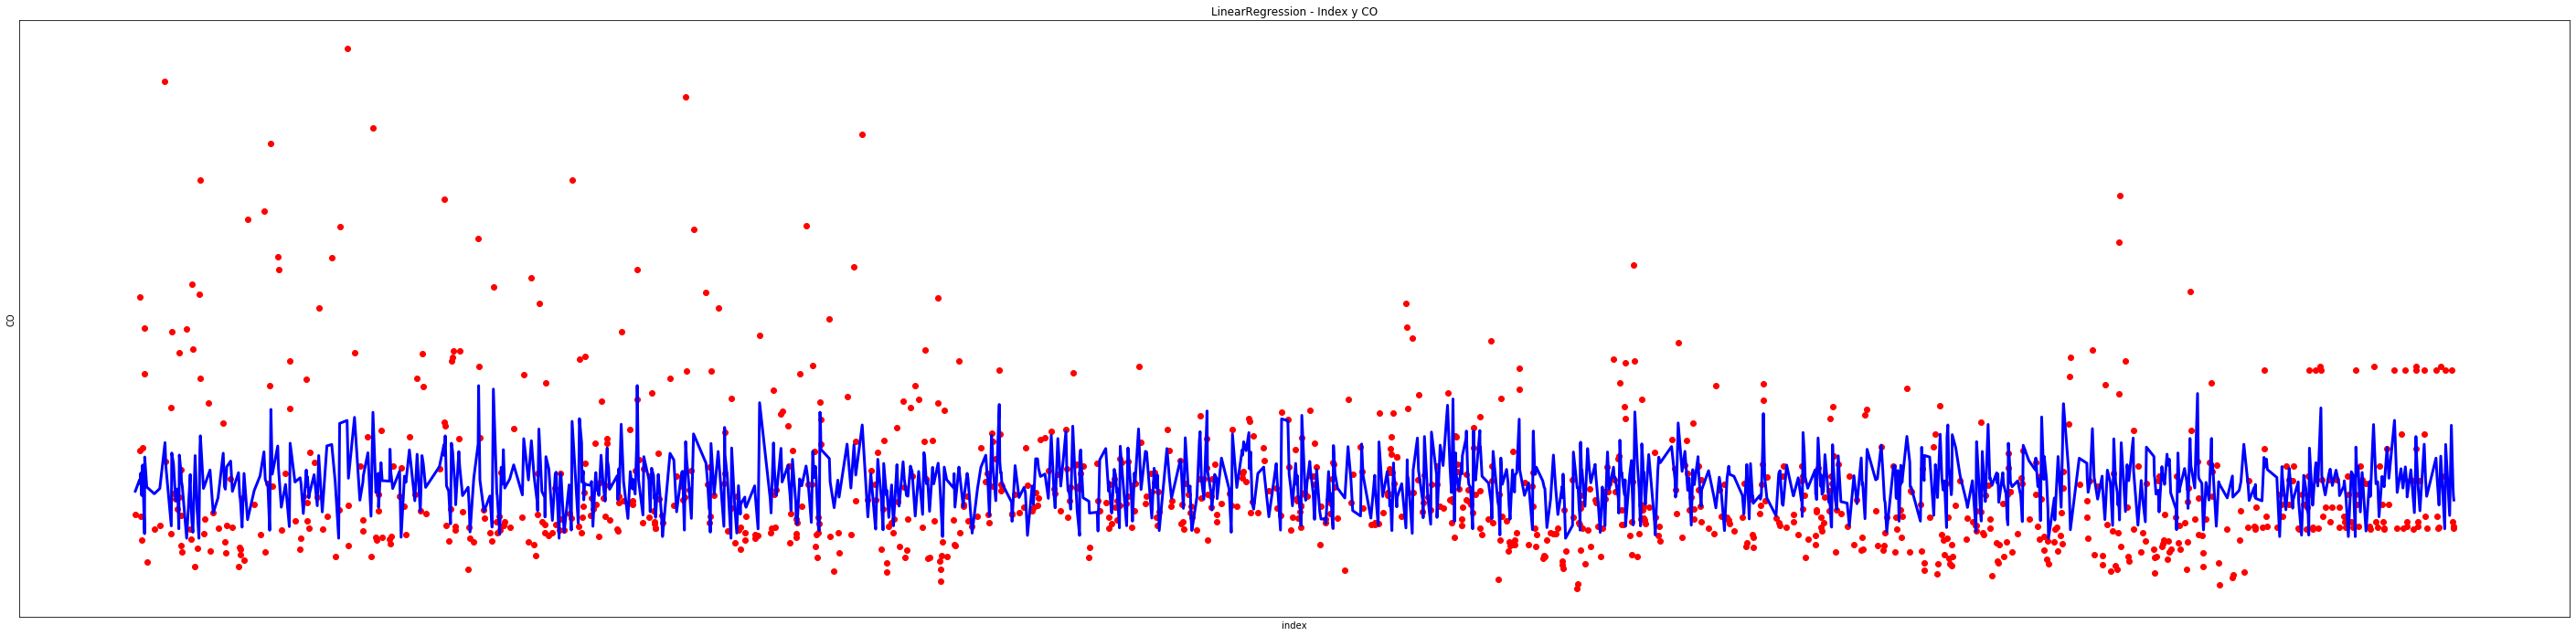

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
Mean squared error: 0.25169
Coefficient of determination: -0.35136


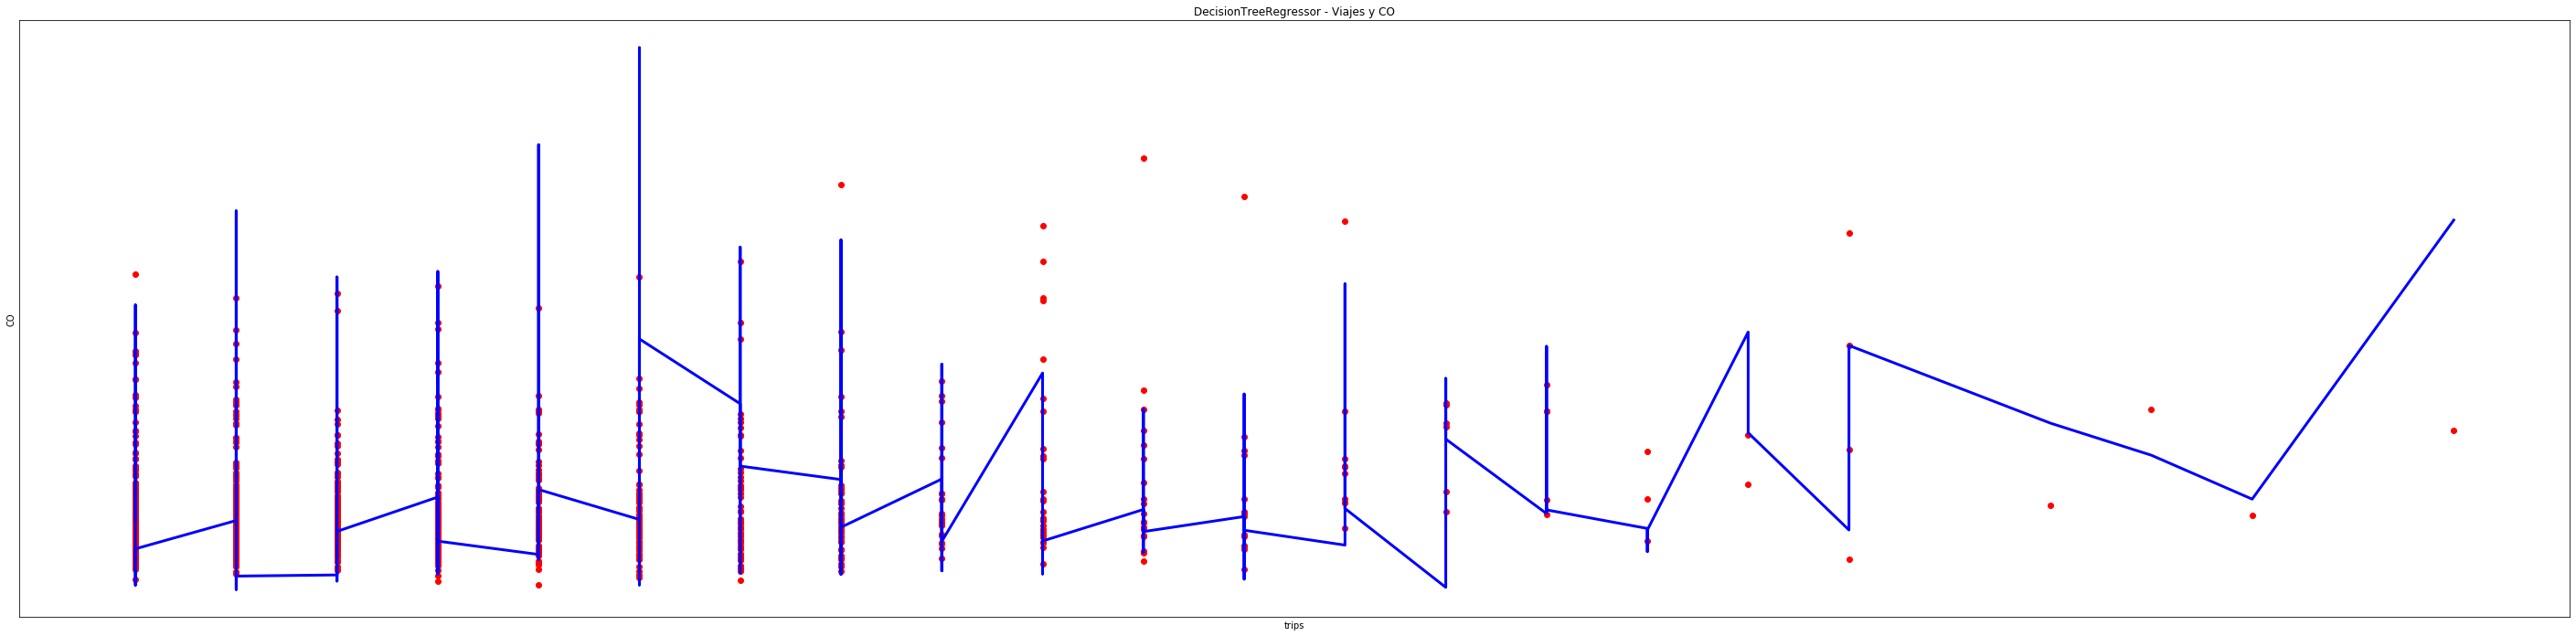

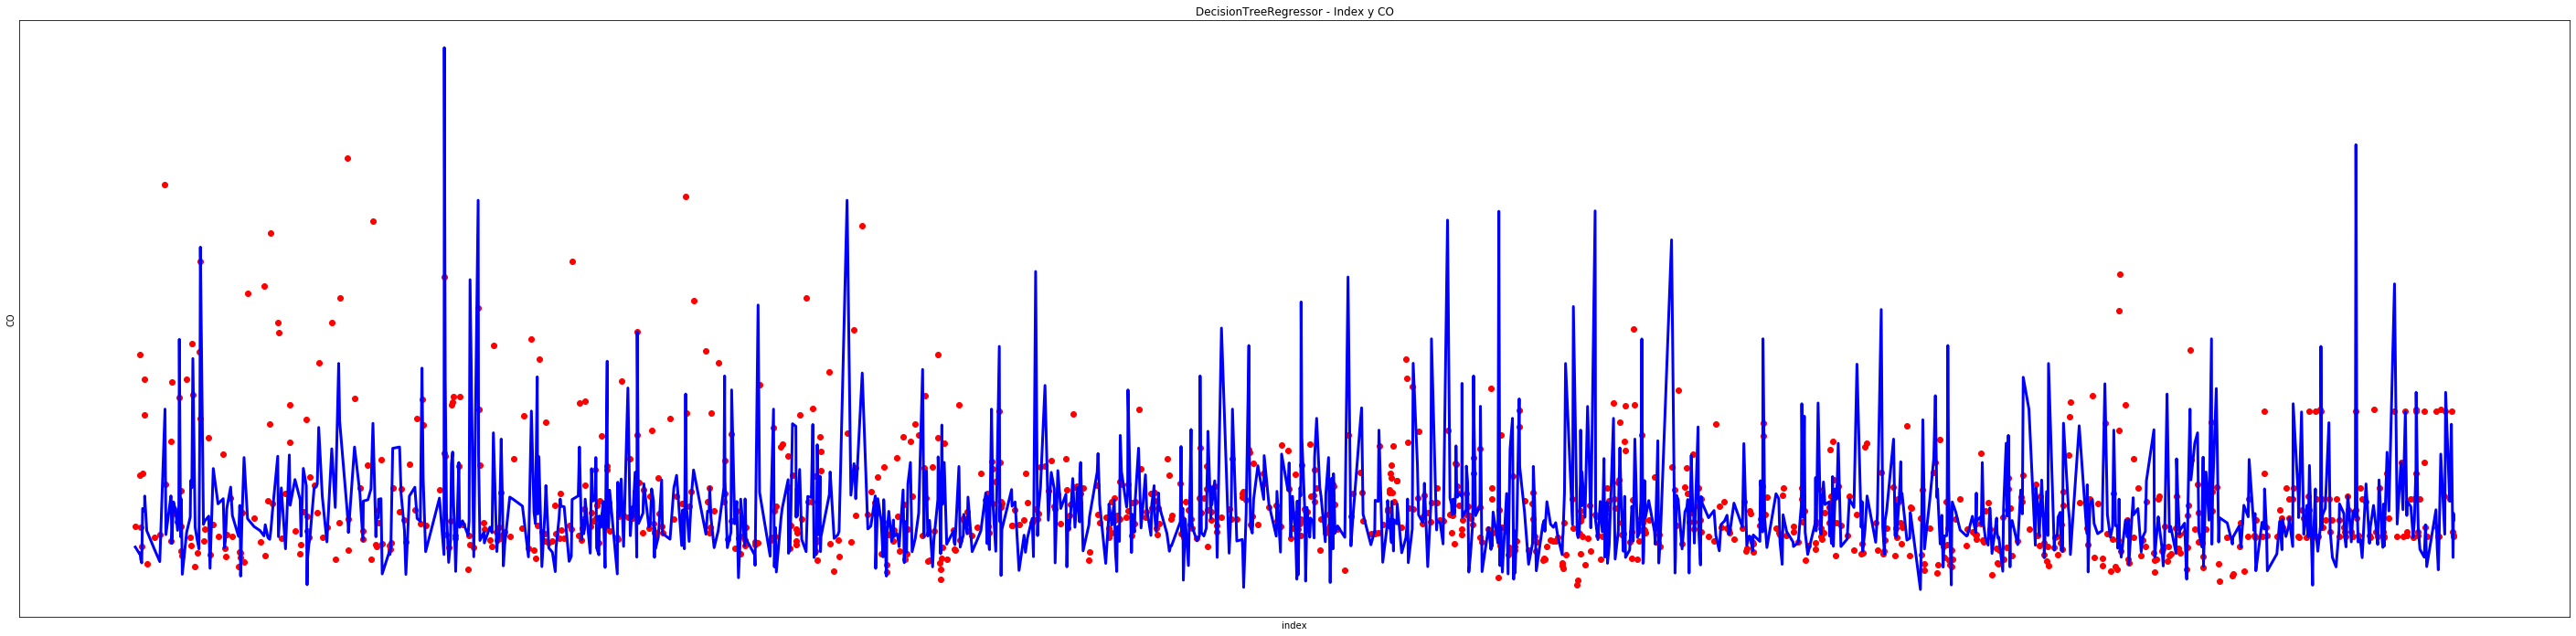

----------------------------------------------------MLPRegressor----------------------------------------------------
Mean squared error: 332438.25724
Coefficient of determination: -1784880.40090


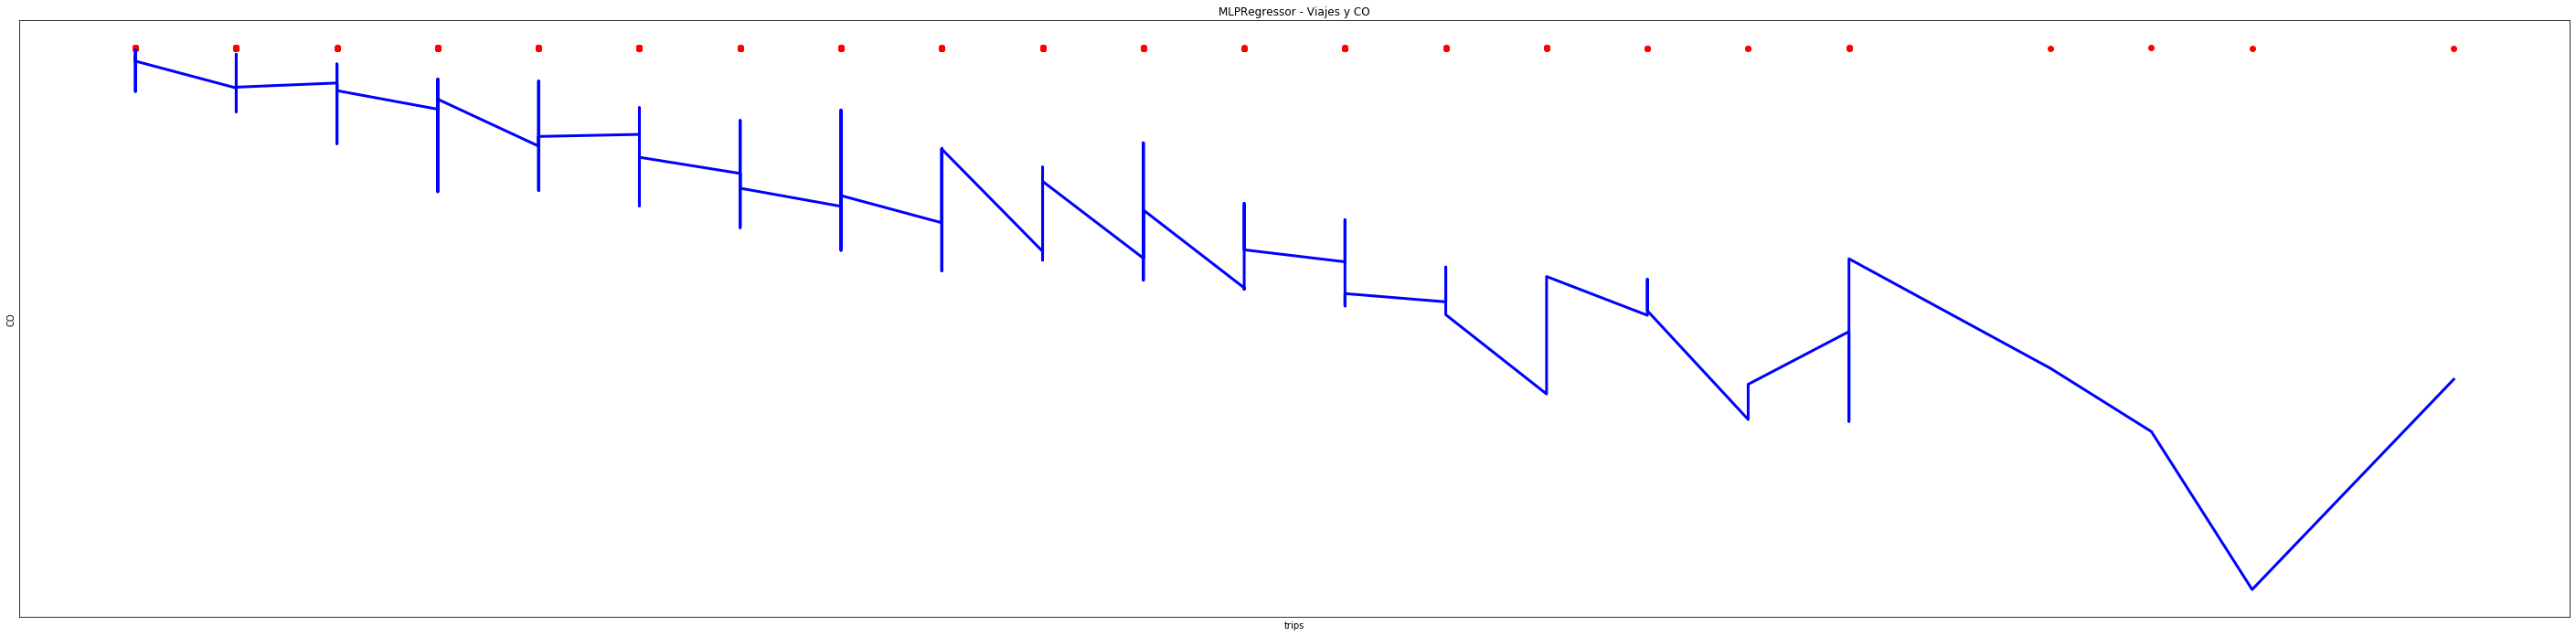

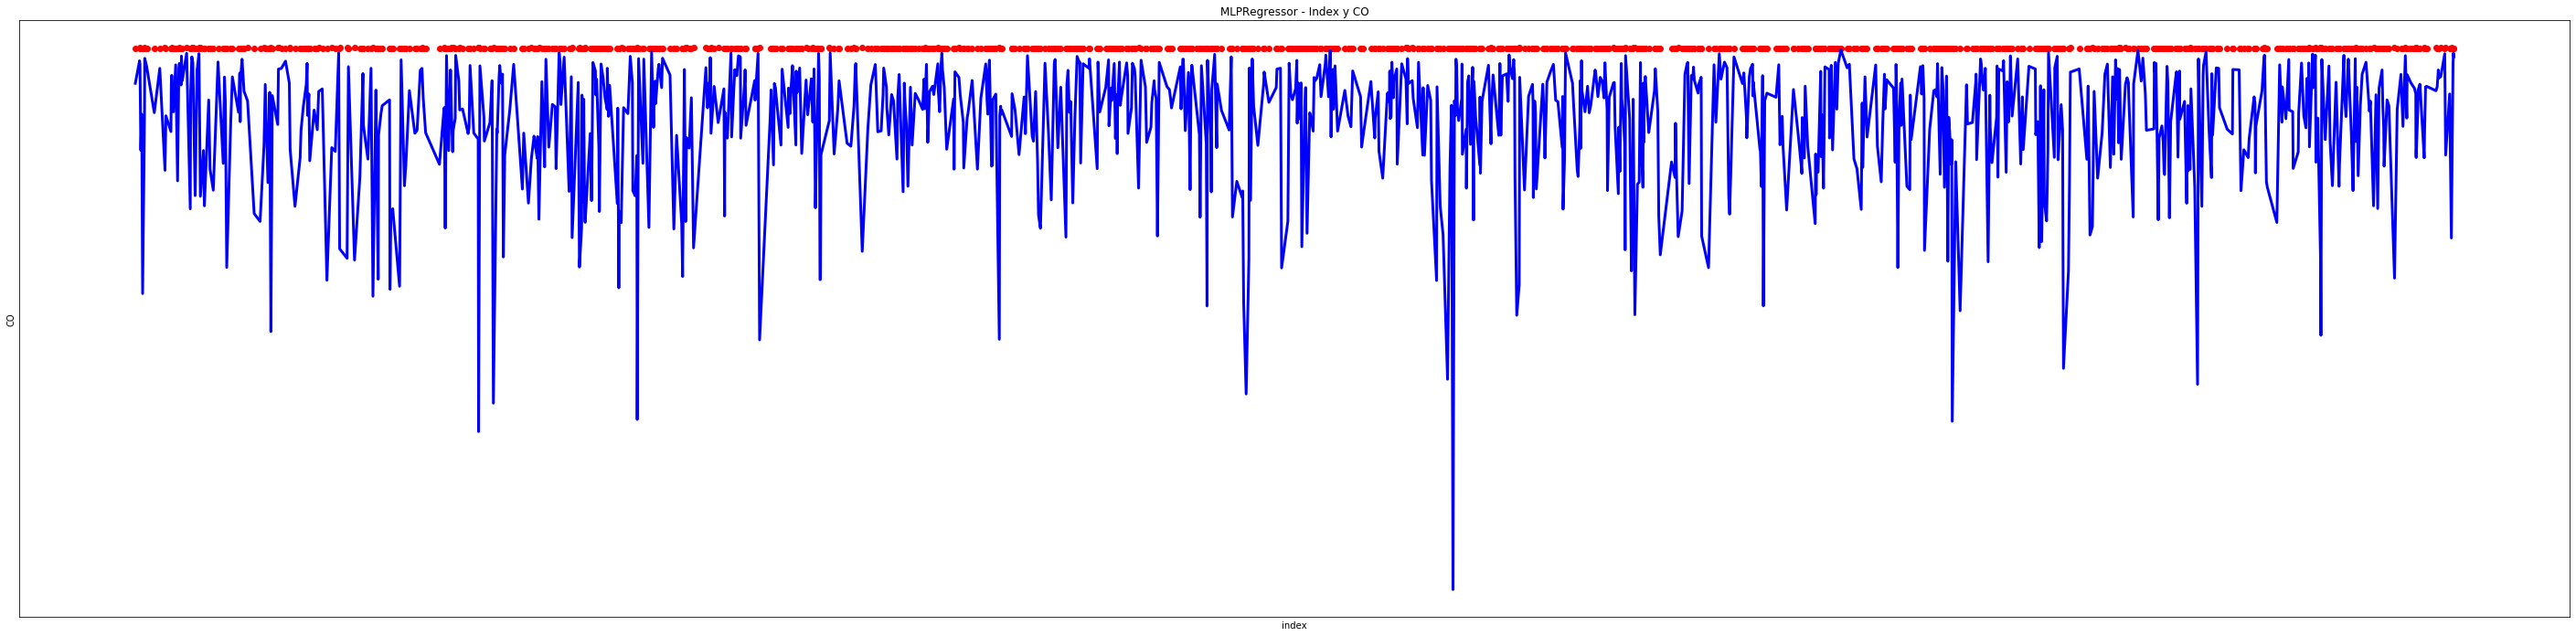

In [ ]:
train_top2, test_top2 = train_test_split(df_top2, test_size=0.2)

models_top2 = []
models_top2.append(('LinearRegression', linear_model.LinearRegression()))
models_top2.append(('DecisionTreeRegressor', DecisionTreeRegressor(random_state=0)))
models_top2.append(('MLPRegressor', MLPRegressor(random_state=1, max_iter=500)))
results = []
names = []
for name, model in models_top2:
    test_top2.sort_values(by='trips', ascending=True, inplace=True)
    model.fit(train_top2.drop('CO', axis=1), train_top2['CO'])
    y_pred = model.predict(test_top2.drop('CO', axis=1))

    print(f'----------------------------------------------------{name}----------------------------------------------------')
    if(name == 'LinearRegression'):
      print('Coefficients: \n', regr.coef_)
    print('Mean squared error: %.5f'
          % mean_squared_error(test_top2['CO'], y_pred))
    print('Coefficient of determination: %.5f'
          % r2_score(test_top2['CO'], y_pred))
    
    plt.scatter(test_top2['trips'], test_top2['CO'],  color='red')
    plt.plot(test_top2['trips'], y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('trips')
    plt.ylabel('CO')
    plt.title(name + ' - Viajes y CO')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

    test_top2 = test_top2.sort_index(axis = 0) 
    y_pred = model.predict(test_top2.drop('CO', axis=1))
    # Plot outputs
    plt.scatter(test_top2.index, test_top2['CO'],  color='red')
    plt.plot(test_top2.index, y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('index')
    plt.ylabel('CO')
    plt.title(name + ' - Index y CO')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

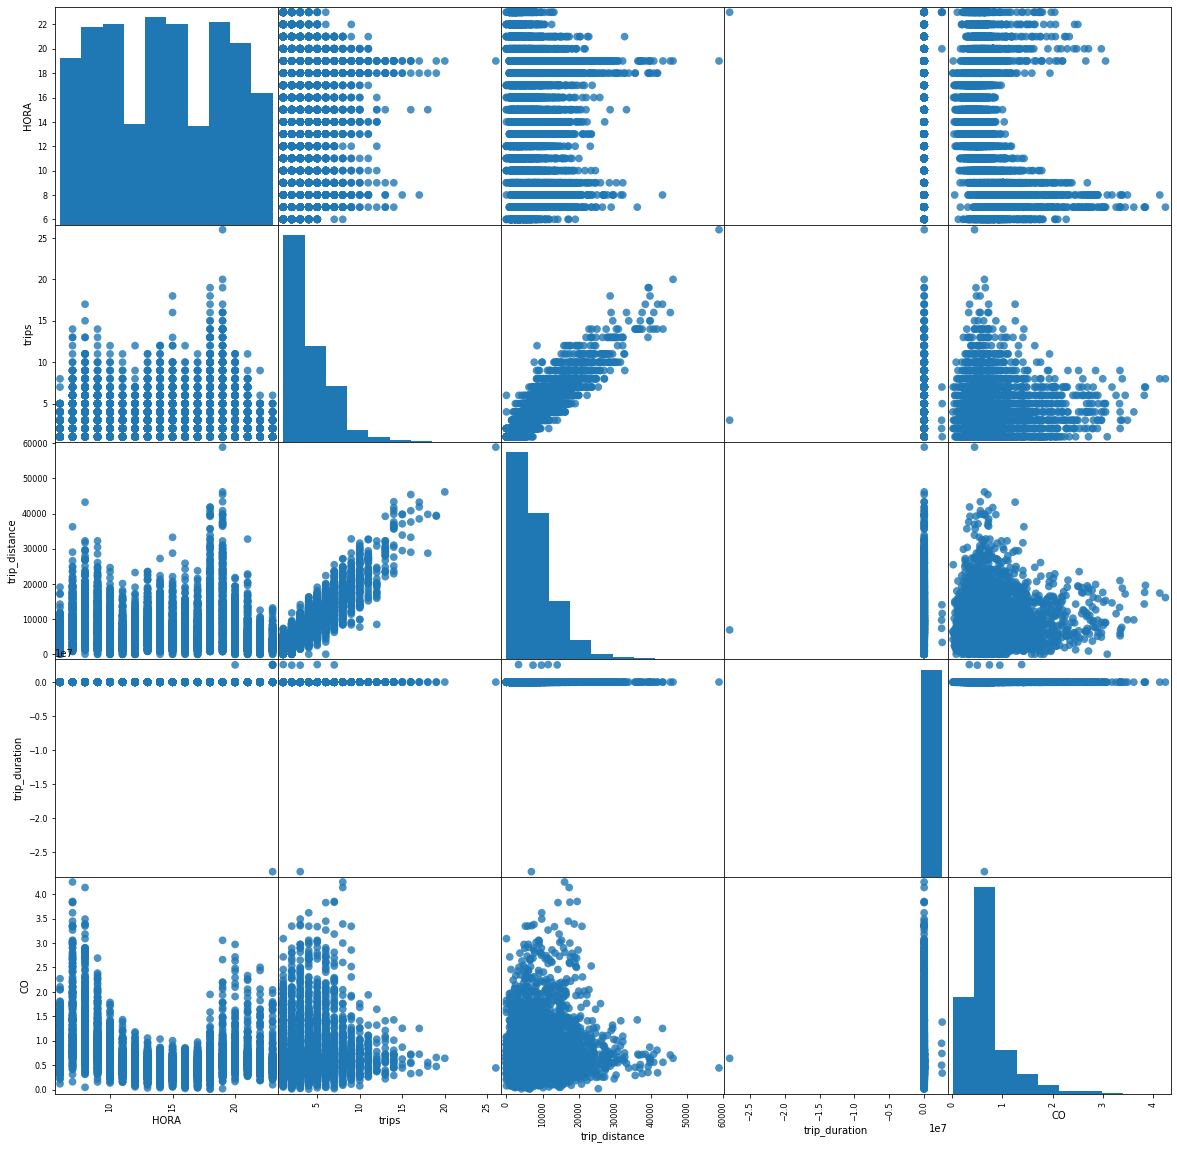

In [ ]:
# bike_station_id top3
df_top3 = df.query('bike_station_id == 161')
df_top3 = df_top3[['HORA', 'trips', 'trip_distance', 'trip_duration', 'CO']]
pd.plotting.scatter_matrix(df_top3, figsize=(20,20), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)
plt.show()

<ipython-input-28-95311761e540>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_top3.sort_values(by='trips', ascending=True, inplace=True)


----------------------------------------------------LinearRegression----------------------------------------------------
Coefficients: 
 [ 2.3982865  -2.35084315  2.36923443 -0.44467765]
Mean squared error: 0.22436
Coefficient of determination: 0.12539


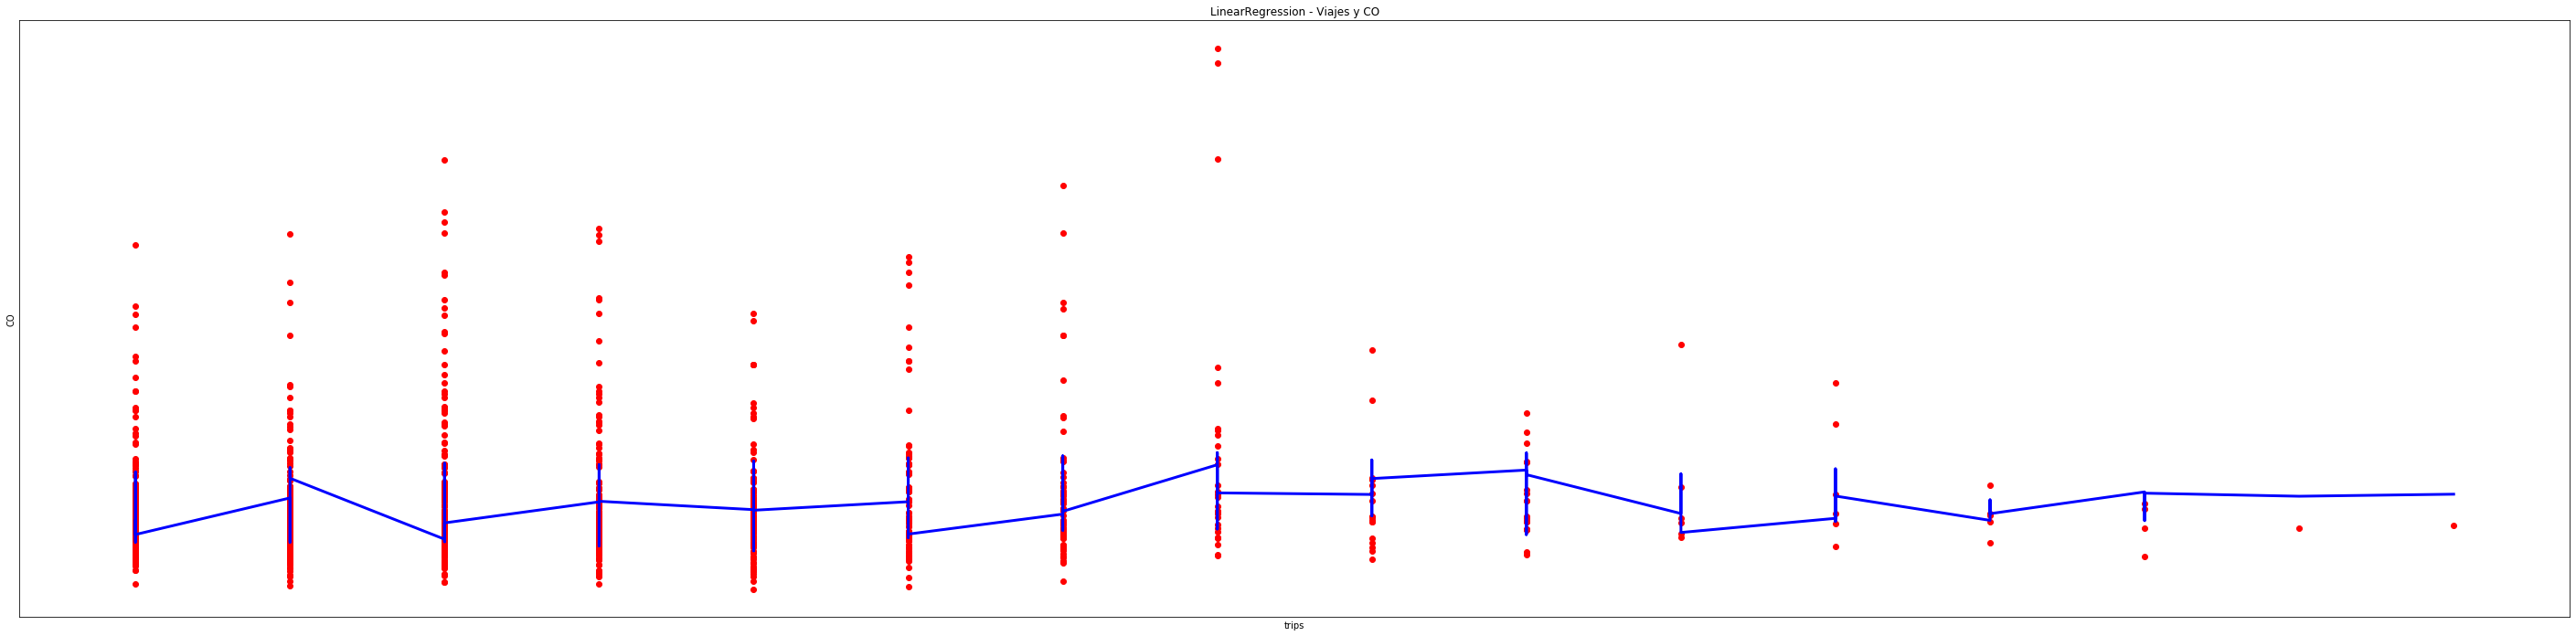

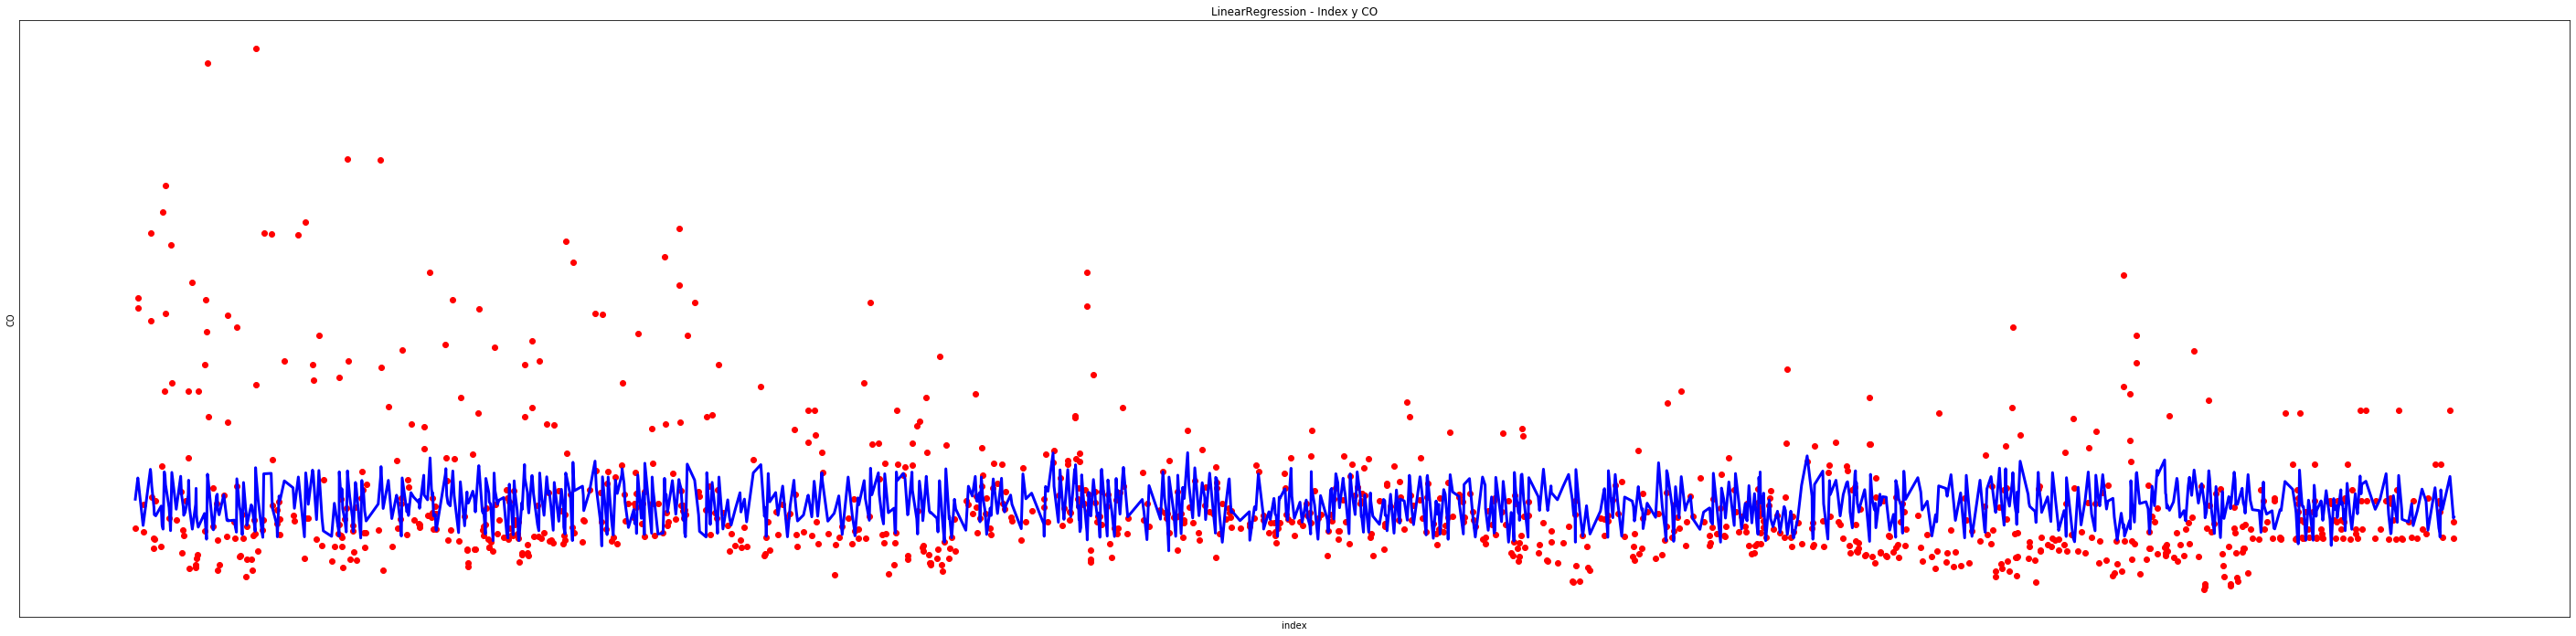

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
Mean squared error: 0.25368
Coefficient of determination: 0.01109


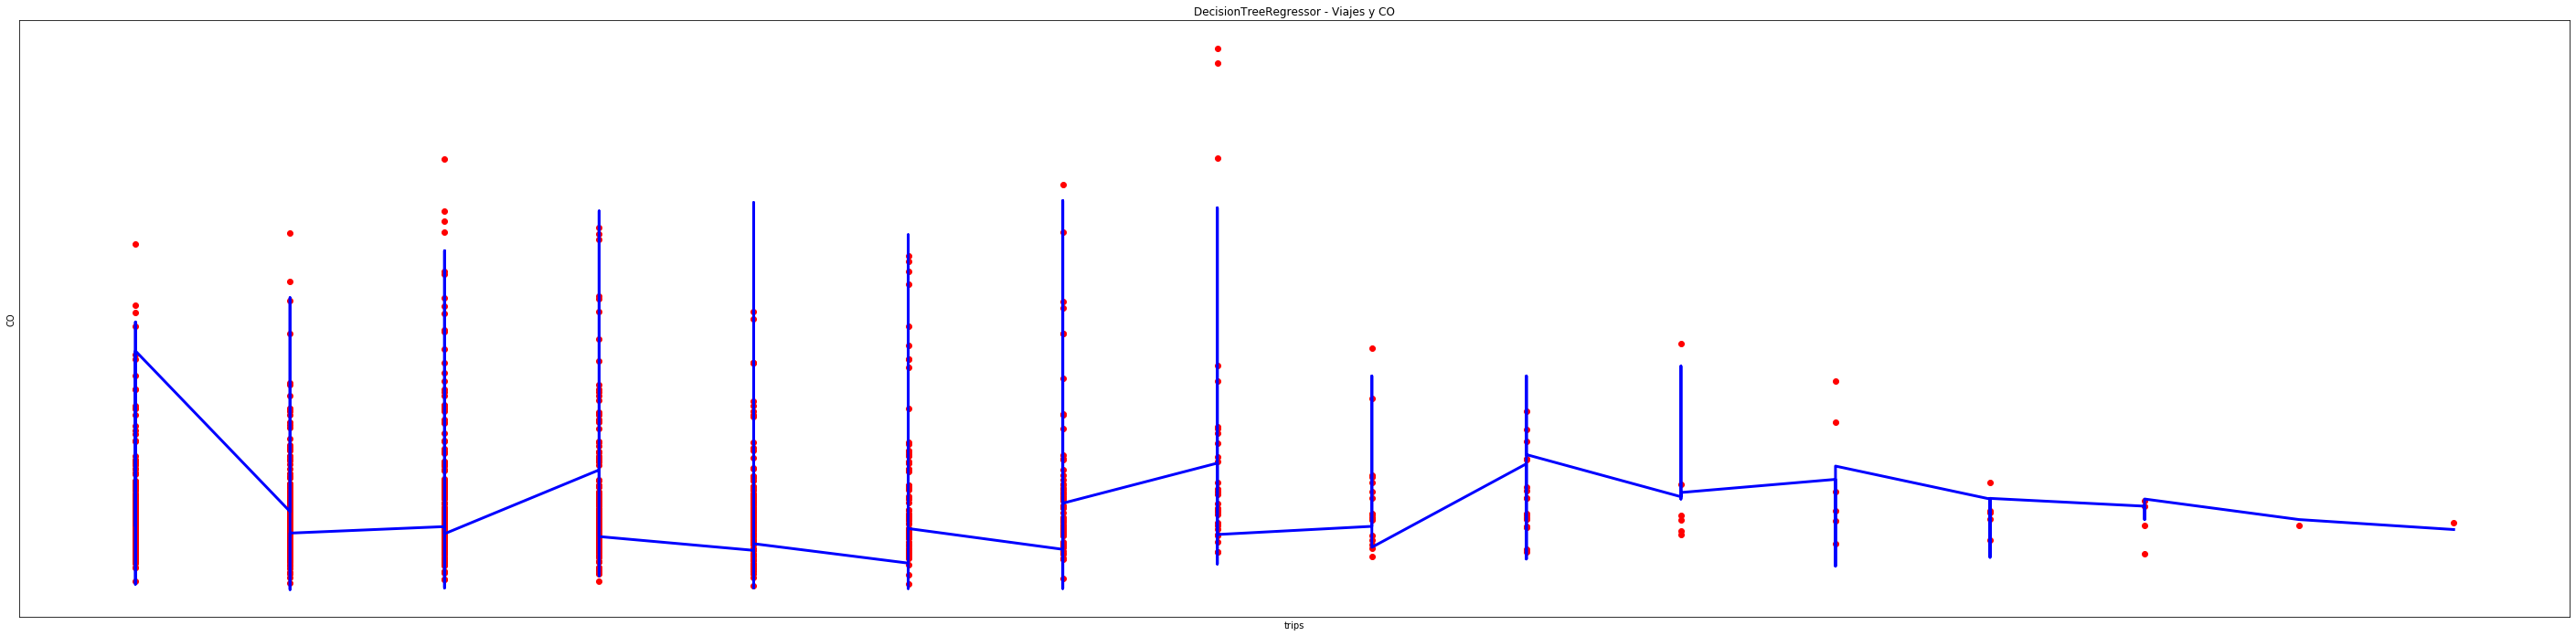

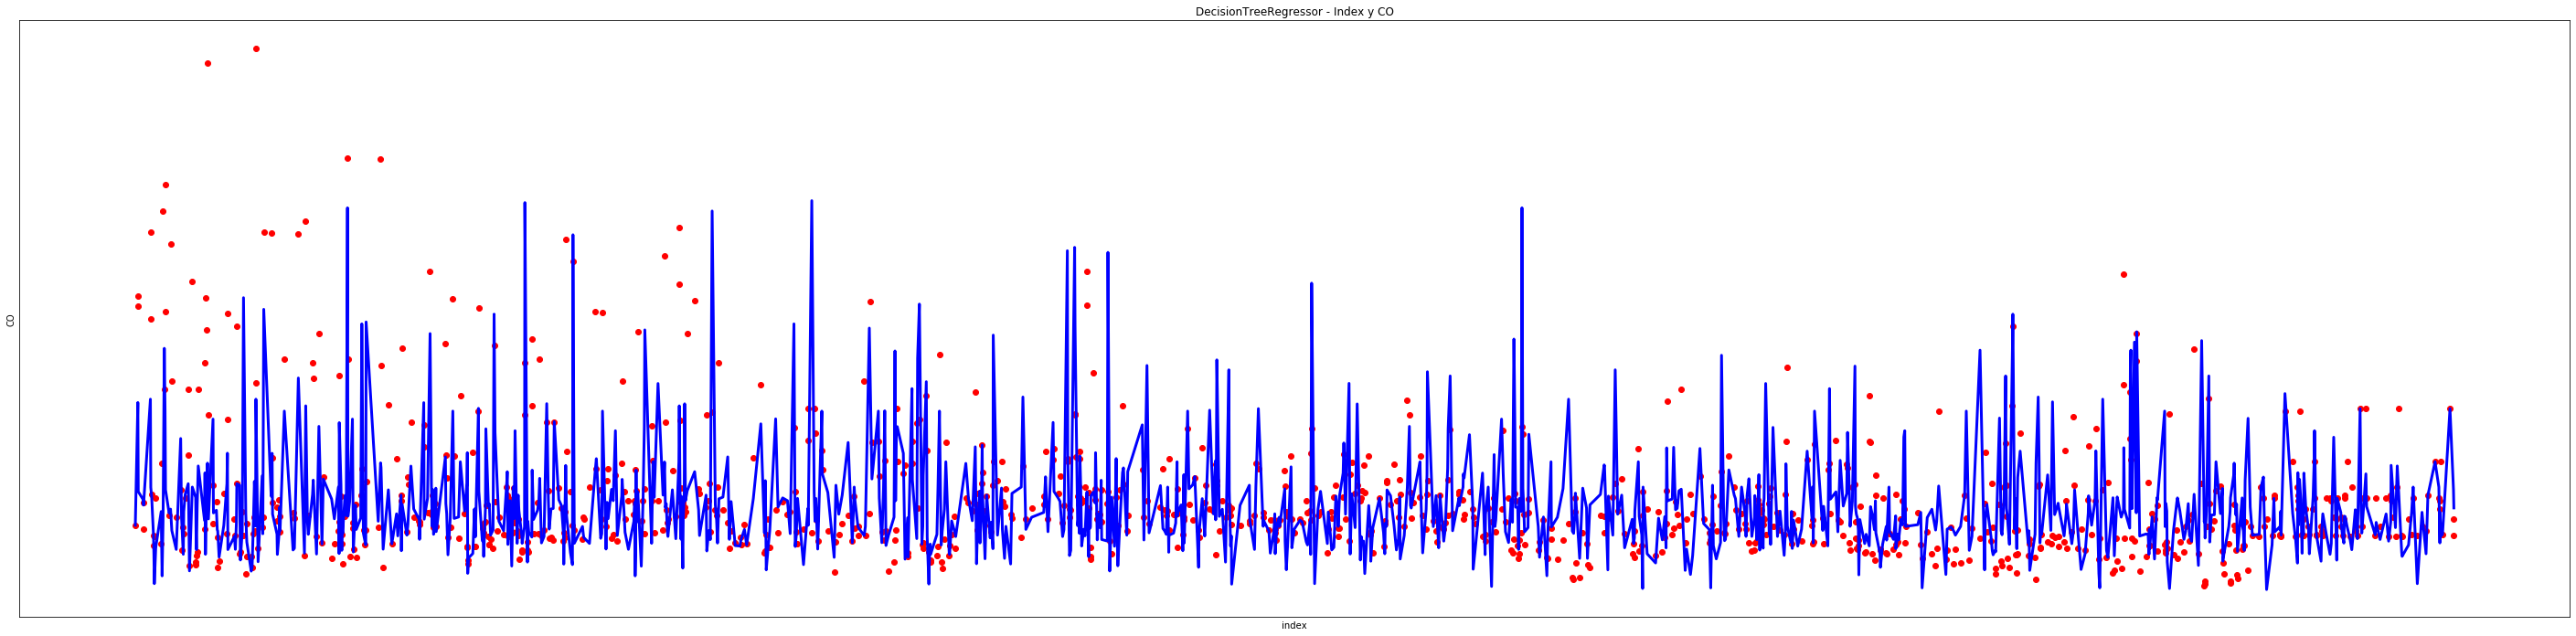

----------------------------------------------------MLPRegressor----------------------------------------------------
Mean squared error: 7654.85685
Coefficient of determination: -29839.57305


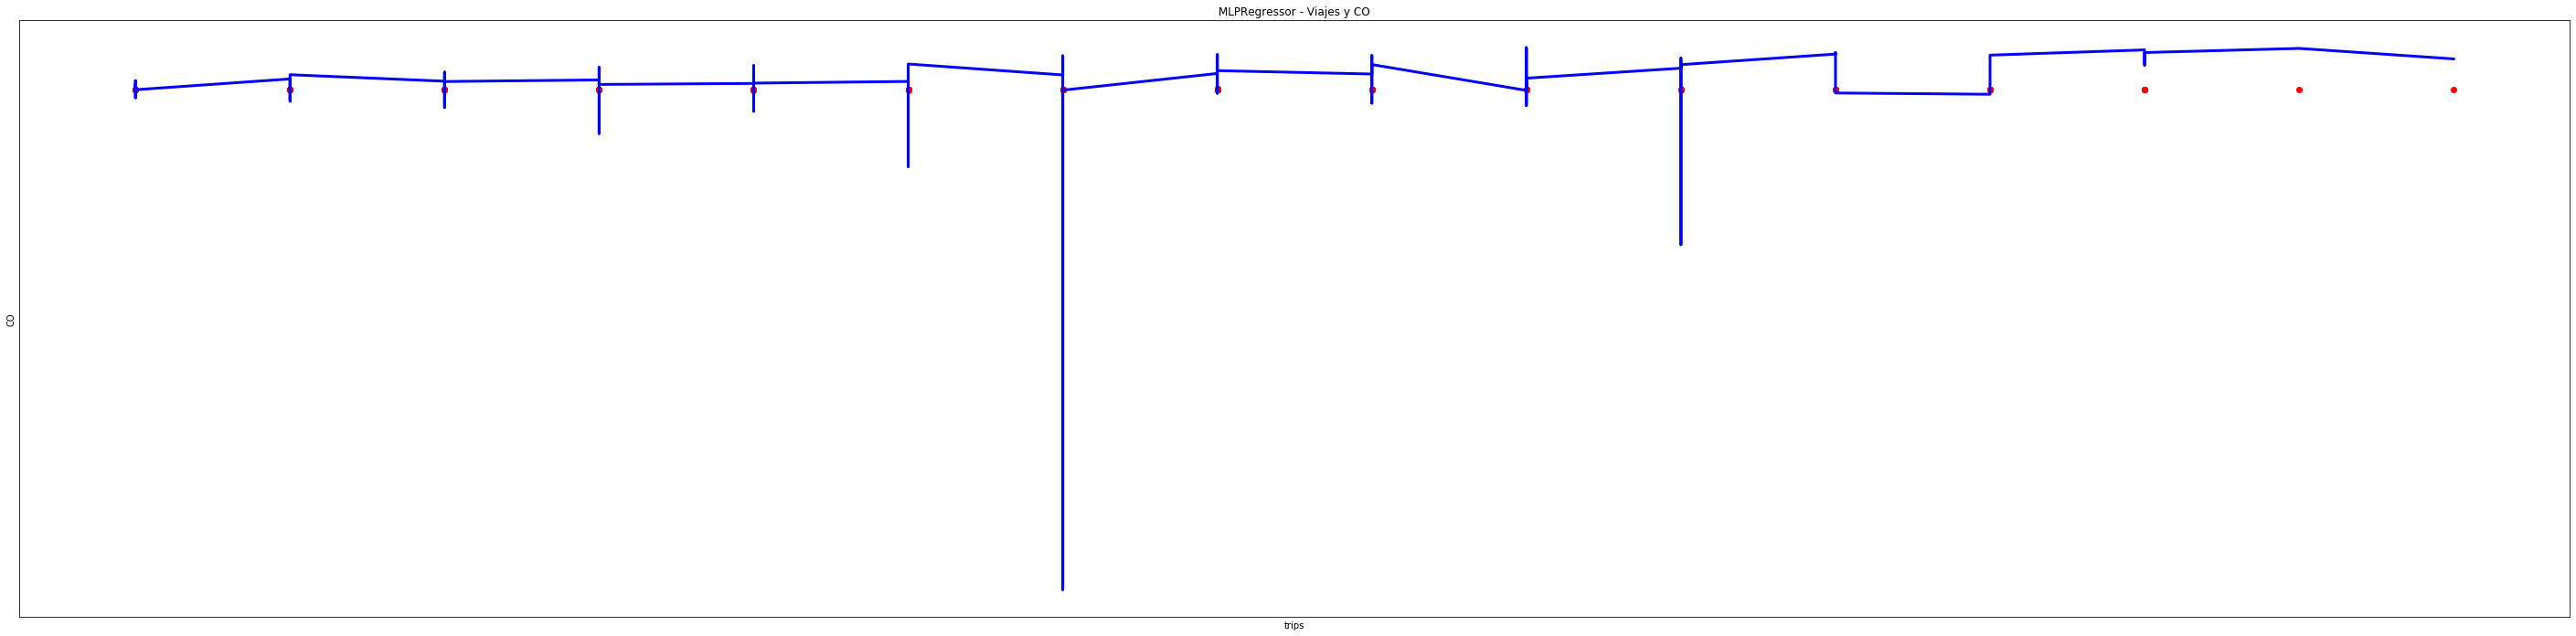

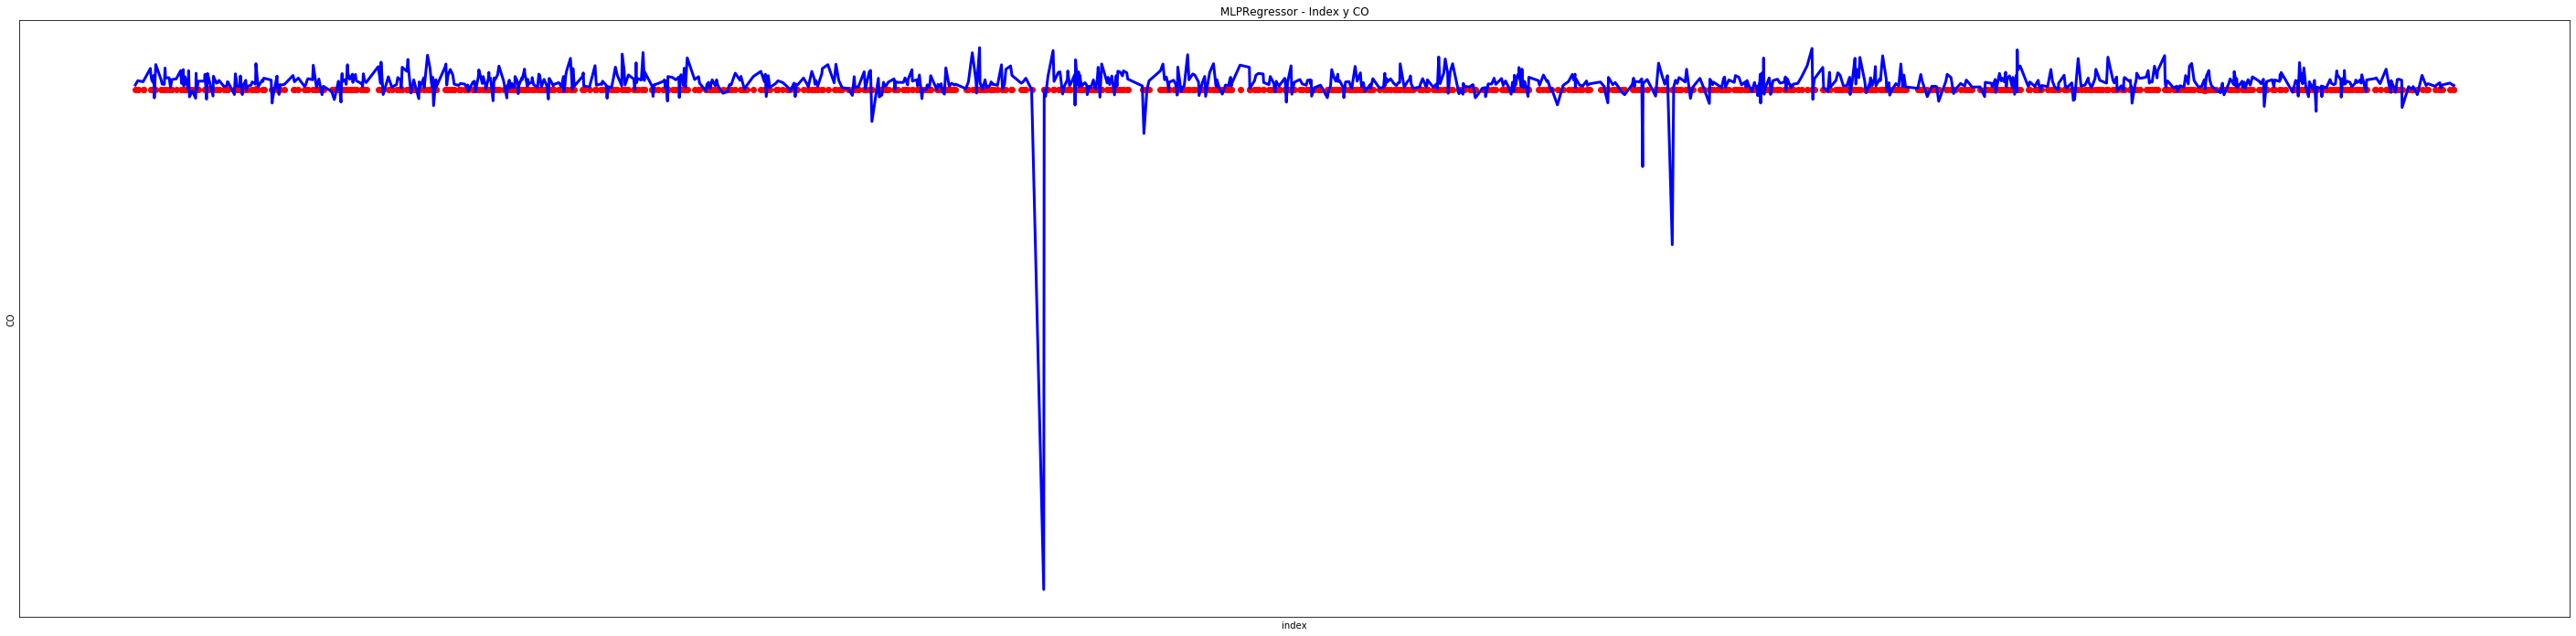

In [ ]:
train_top3, test_top3 = train_test_split(df_top3, test_size=0.2)

models_top3 = []
models_top3.append(('LinearRegression', linear_model.LinearRegression()))
models_top3.append(('DecisionTreeRegressor', DecisionTreeRegressor(random_state=0)))
models_top3.append(('MLPRegressor', MLPRegressor(random_state=1, max_iter=500)))
results = []
names = []
for name, model in models_top3:
    test_top3.sort_values(by='trips', ascending=True, inplace=True)
    model.fit(train_top3.drop('CO', axis=1), train_top3['CO'])
    y_pred = model.predict(test_top3.drop('CO', axis=1))

    print(f'----------------------------------------------------{name}----------------------------------------------------')
    if(name == 'LinearRegression'):
      print('Coefficients: \n', regr.coef_)
    print('Mean squared error: %.5f'
          % mean_squared_error(test_top3['CO'], y_pred))
    print('Coefficient of determination: %.5f'
          % r2_score(test_top3['CO'], y_pred))
    
    plt.scatter(test_top3['trips'], test_top3['CO'],  color='red')
    plt.plot(test_top3['trips'], y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('trips')
    plt.ylabel('CO')
    plt.title(name + ' - Viajes y CO')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

    test_top3 = test_top3.sort_index(axis = 0) 
    y_pred = model.predict(test_top3.drop('CO', axis=1))
    # Plot outputs
    plt.scatter(test_top3.index, test_top3['CO'],  color='red')
    plt.plot(test_top3.index, y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('index')
    plt.ylabel('CO')
    plt.title(name + ' - Index y CO')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

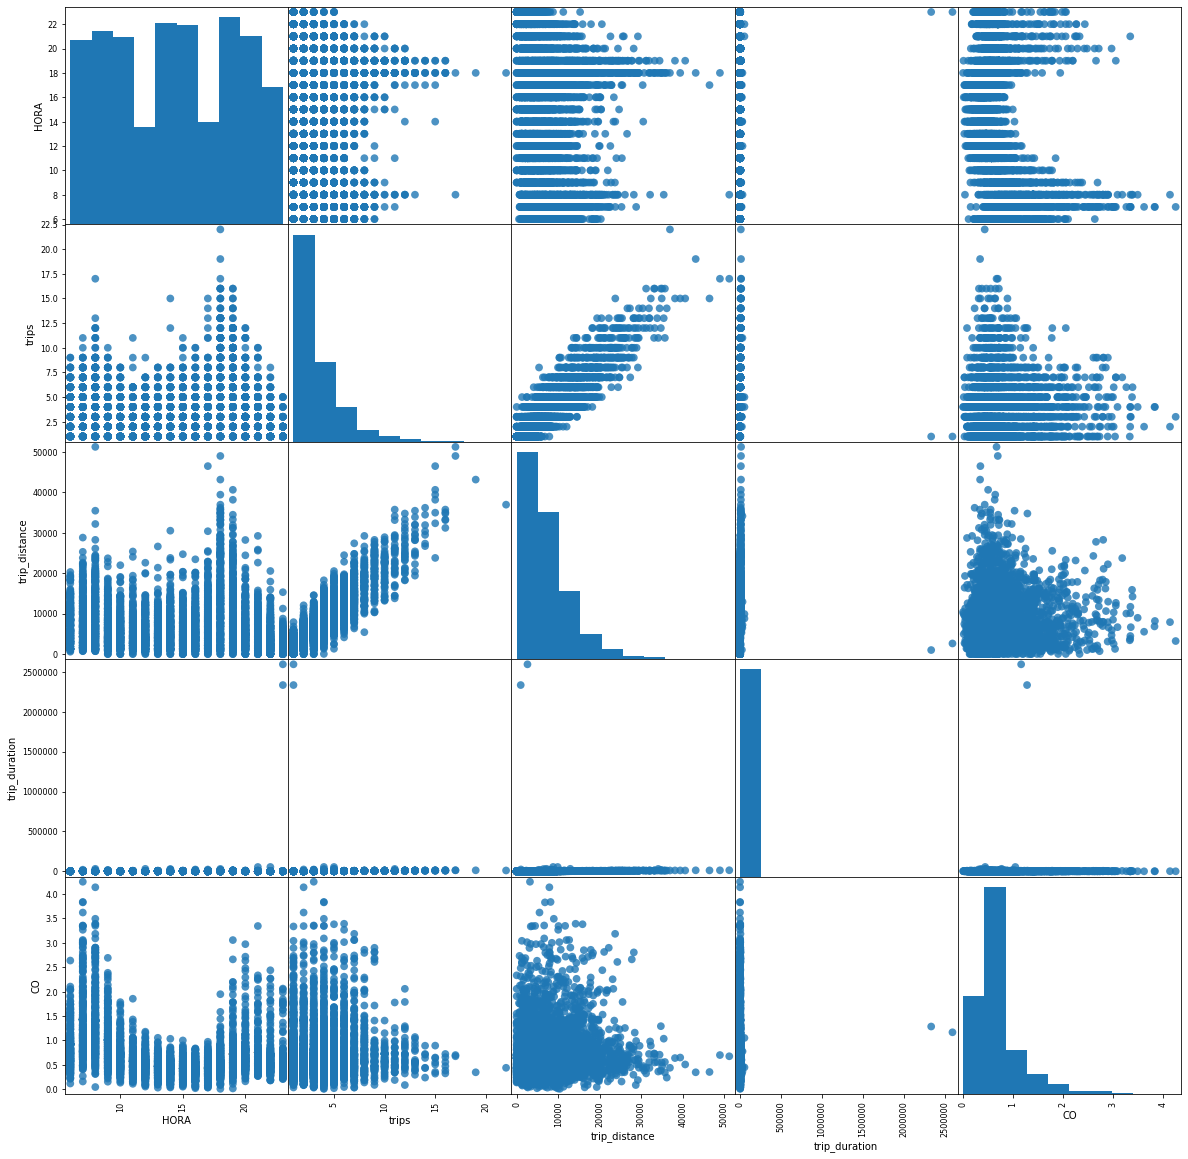

In [ ]:
# bike_station_id top4
df_top4 = df.query('bike_station_id == 249')
df_top4 = df_top4[['HORA', 'trips', 'trip_distance', 'trip_duration', 'CO']]
pd.plotting.scatter_matrix(df_top4, figsize=(20,20), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)
plt.show()

<ipython-input-30-056db1fc113e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_top4.sort_values(by='trips', ascending=True, inplace=True)


----------------------------------------------------LinearRegression----------------------------------------------------
Coefficients: 
 [ 2.3982865  -2.35084315  2.36923443 -0.44467765]
Mean squared error: 0.20094
Coefficient of determination: 0.09108


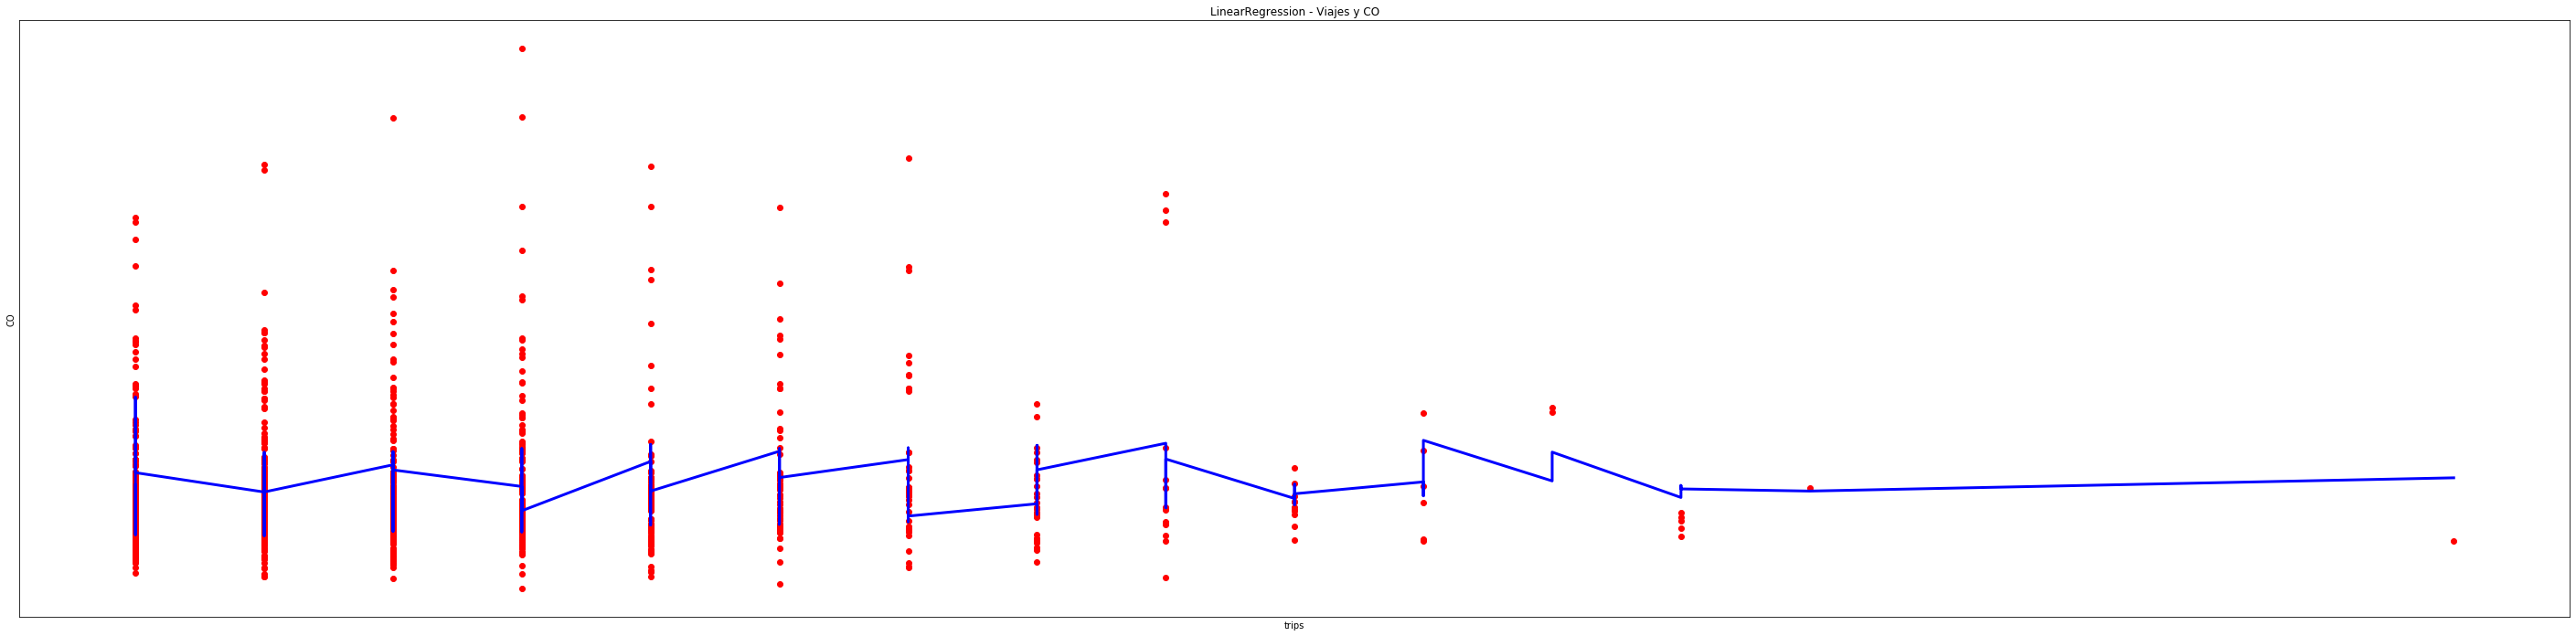

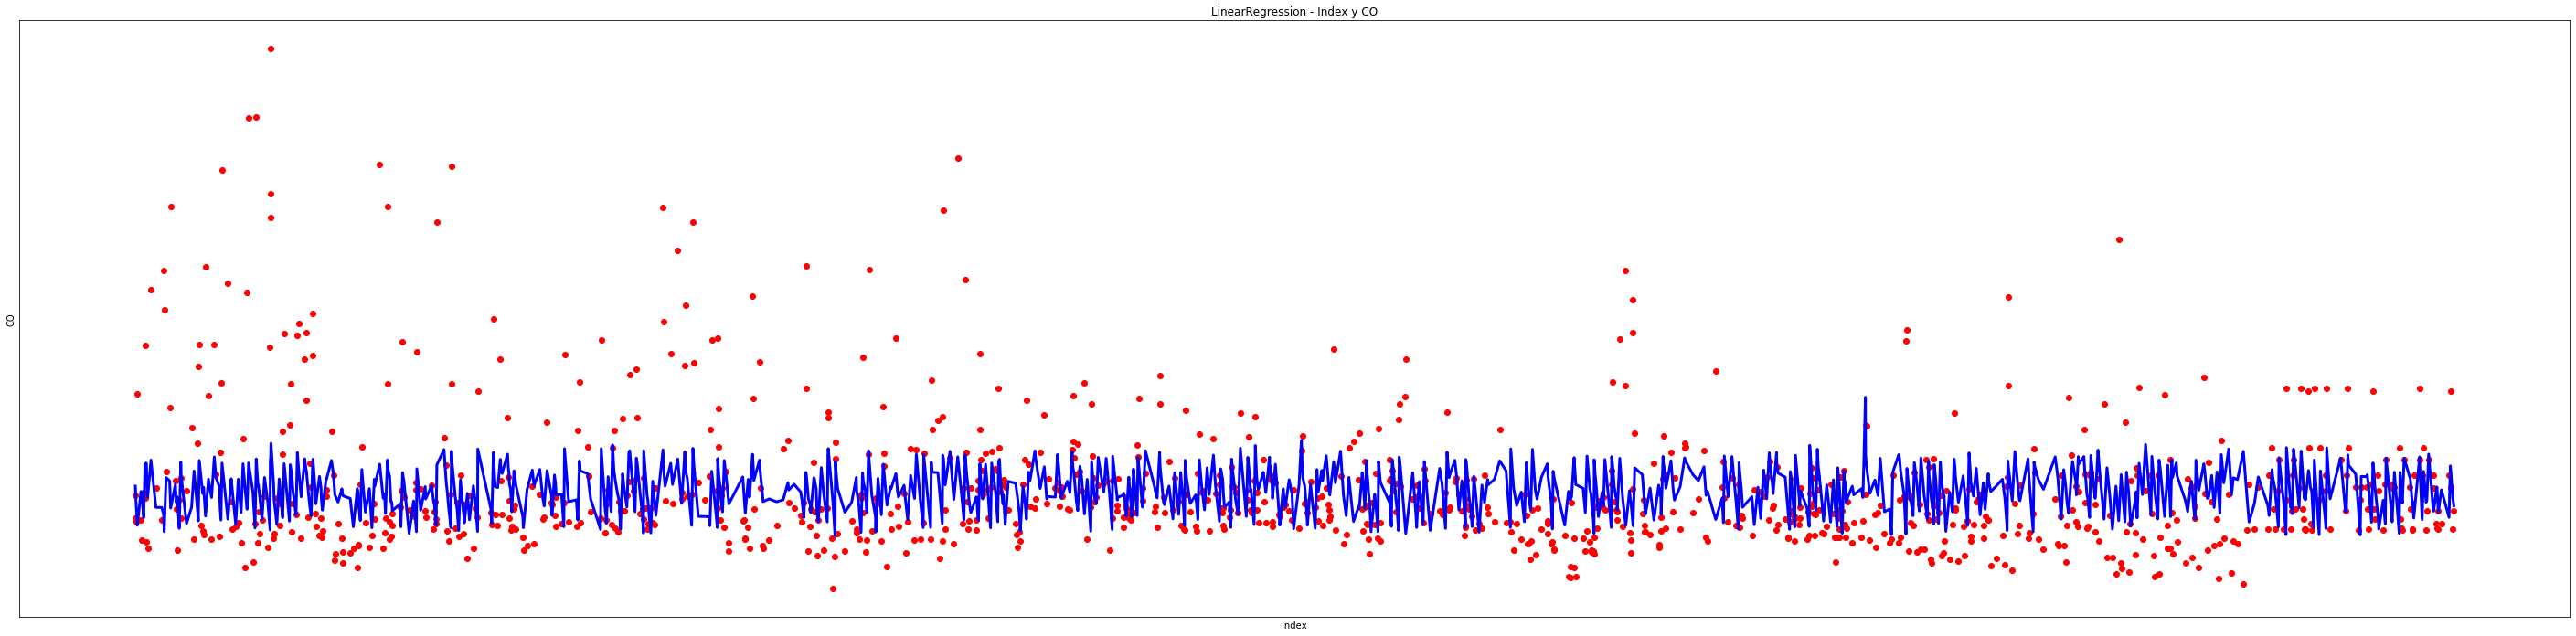

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
Mean squared error: 0.26266
Coefficient of determination: -0.18809


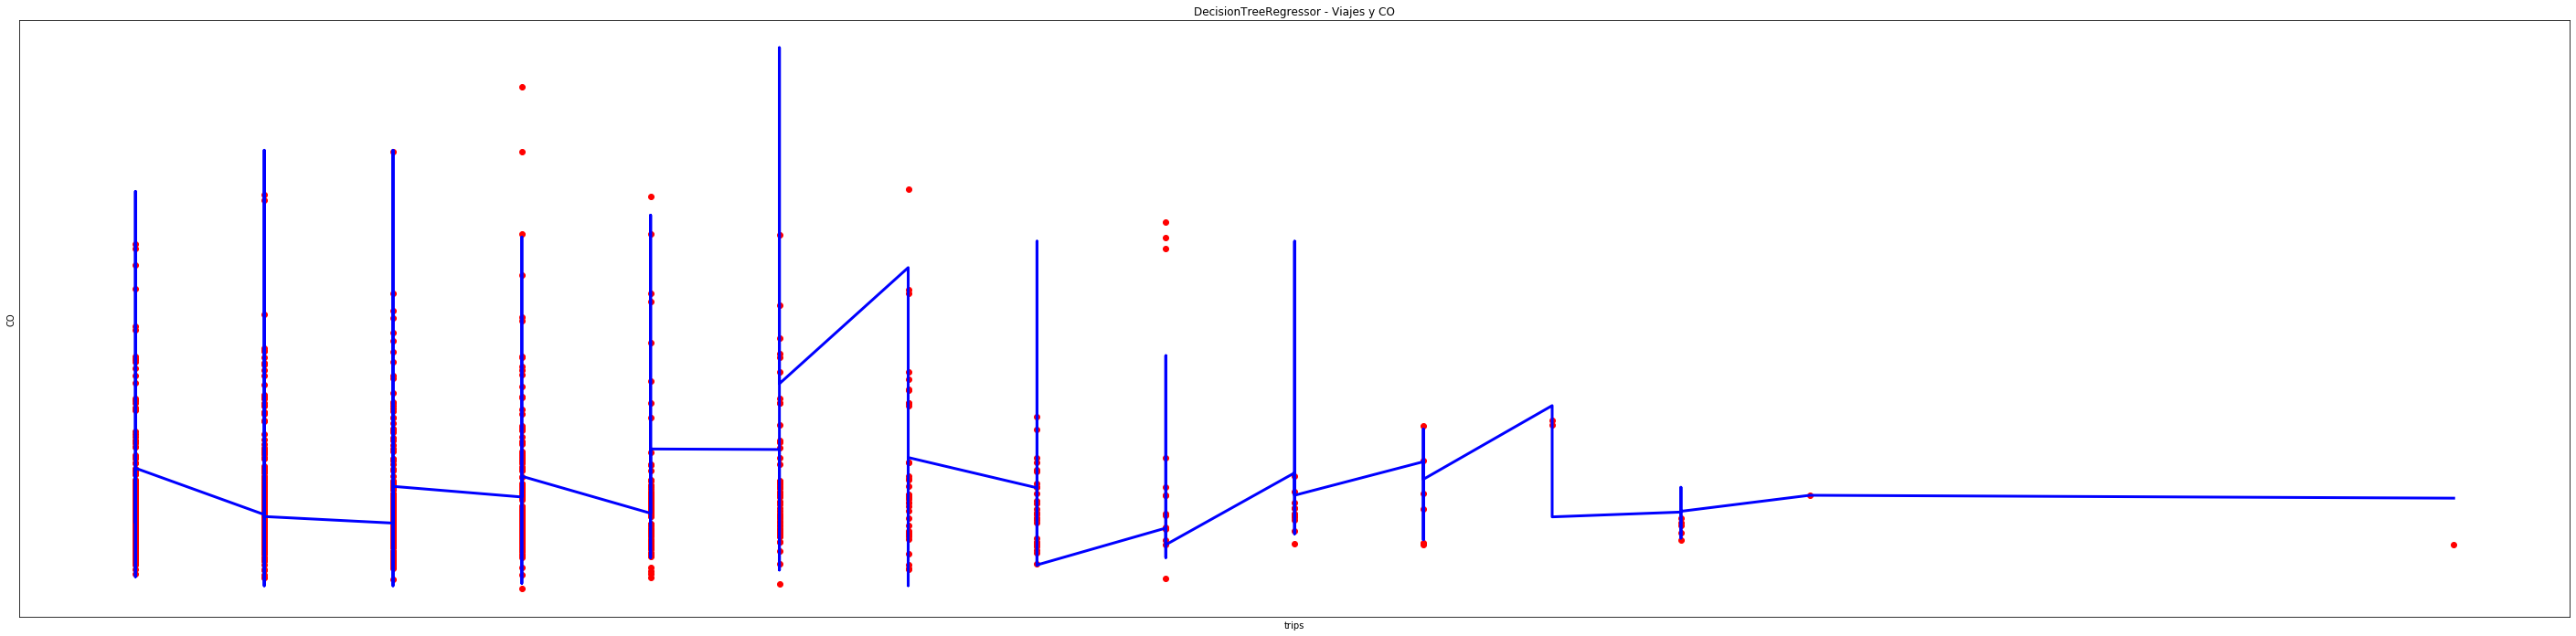

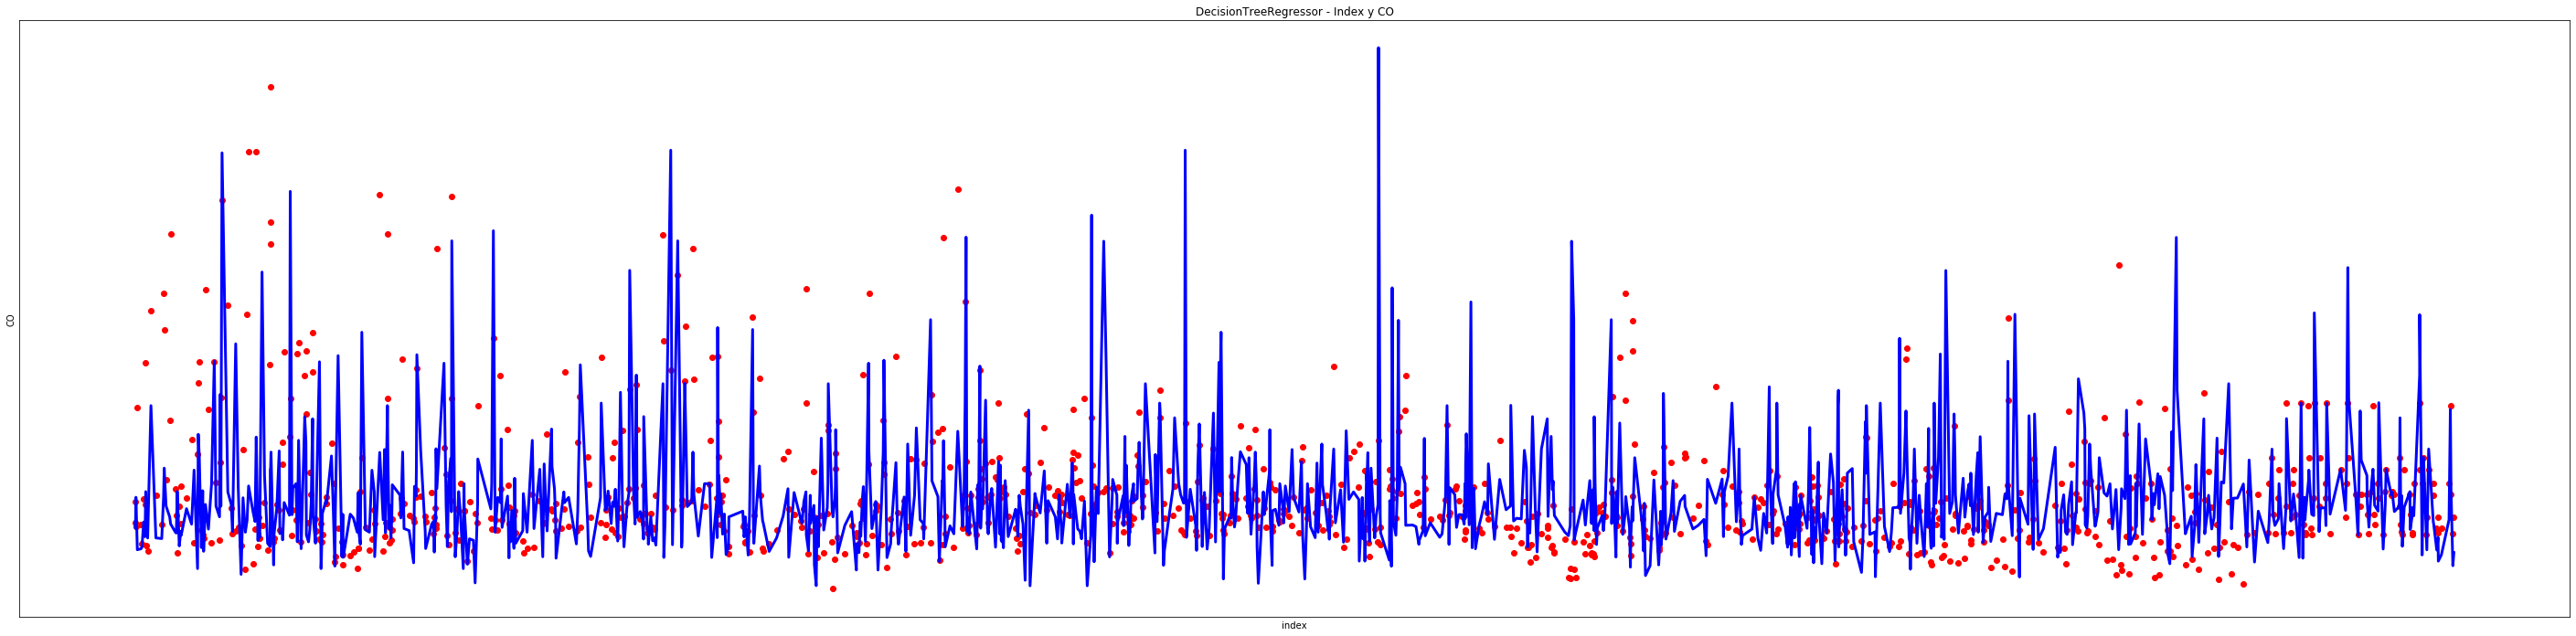

----------------------------------------------------MLPRegressor----------------------------------------------------
Mean squared error: 338446.65568
Coefficient of determination: -1530923.65641


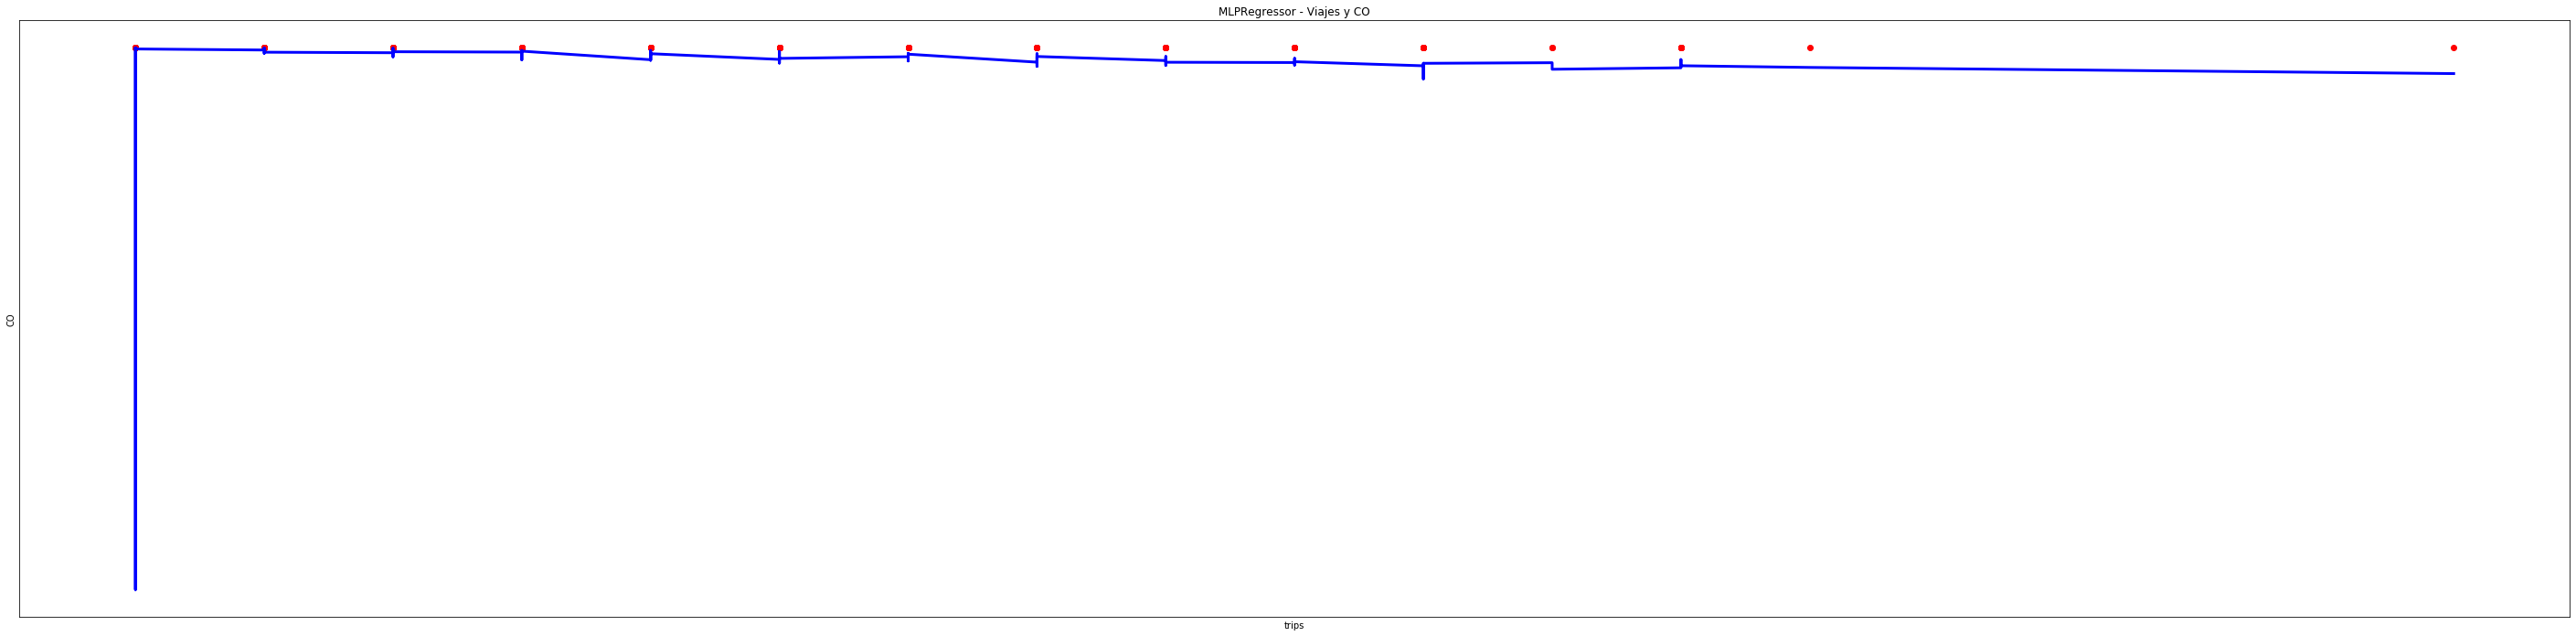

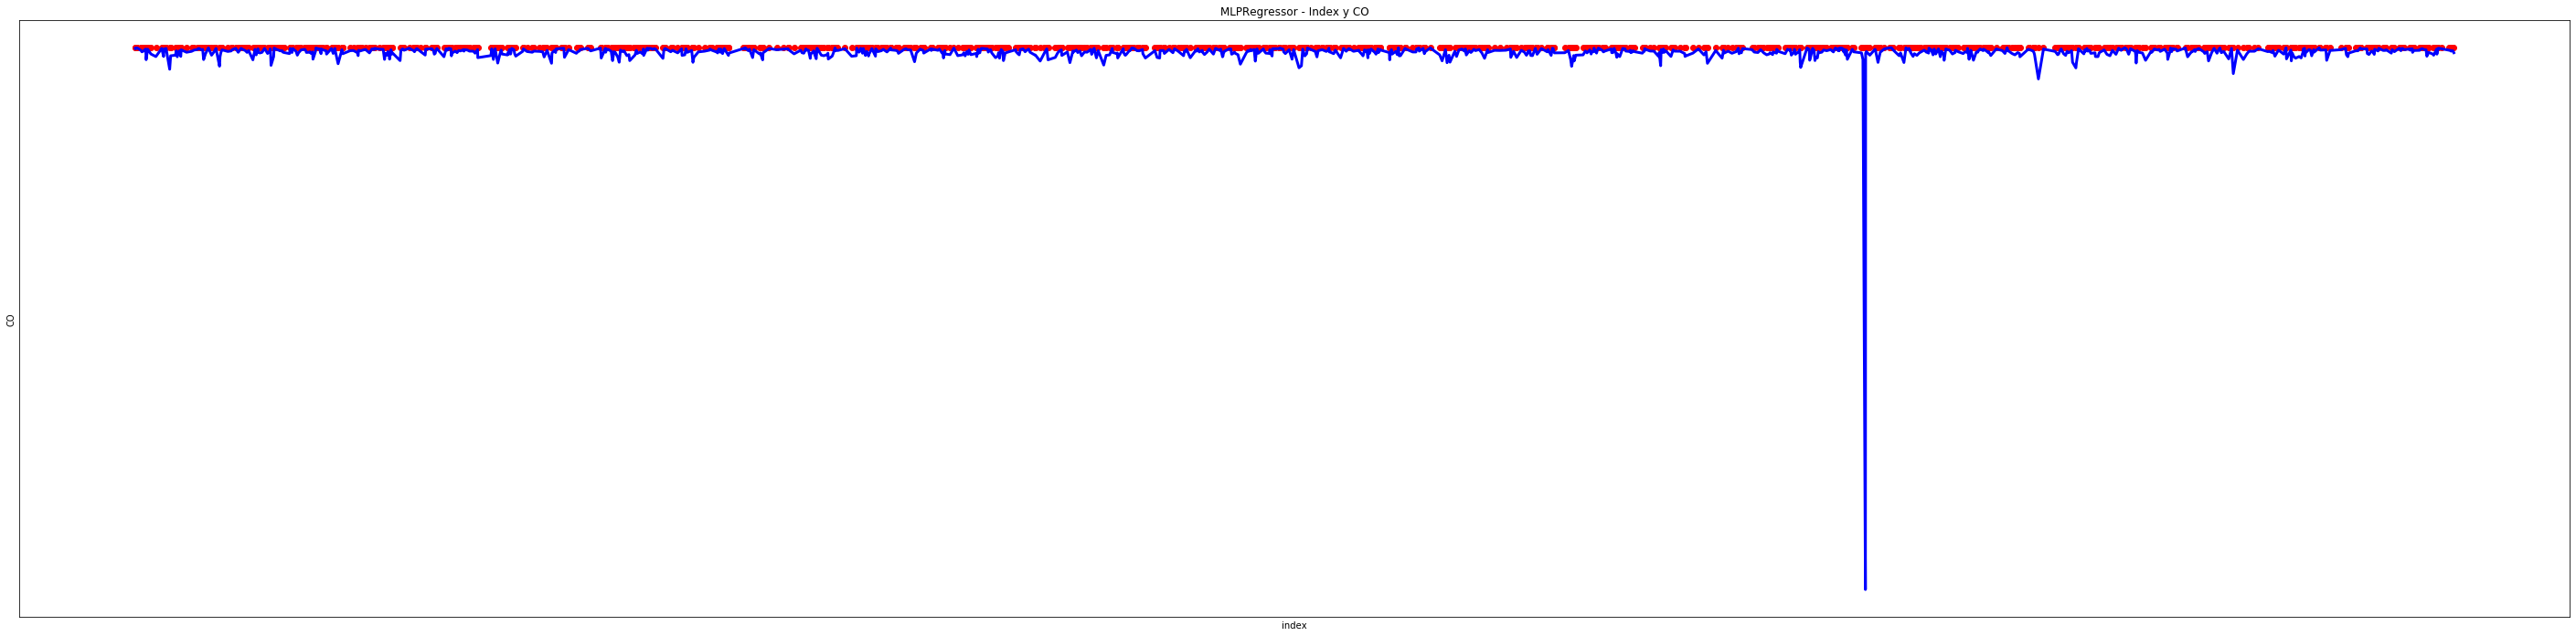

In [ ]:
train_top4, test_top4 = train_test_split(df_top4, test_size=0.2)

models_top4 = []
models_top4.append(('LinearRegression', linear_model.LinearRegression()))
models_top4.append(('DecisionTreeRegressor', DecisionTreeRegressor(random_state=0)))
models_top4.append(('MLPRegressor', MLPRegressor(random_state=1, max_iter=500)))
results = []
names = []
for name, model in models_top4:
    test_top4.sort_values(by='trips', ascending=True, inplace=True)
    model.fit(train_top4.drop('CO', axis=1), train_top4['CO'])
    y_pred = model.predict(test_top4.drop('CO', axis=1))

    print(f'----------------------------------------------------{name}----------------------------------------------------')
    if(name == 'LinearRegression'):
      print('Coefficients: \n', regr.coef_)
    print('Mean squared error: %.5f'
          % mean_squared_error(test_top4['CO'], y_pred))
    print('Coefficient of determination: %.5f'
          % r2_score(test_top4['CO'], y_pred))
    
    plt.scatter(test_top4['trips'], test_top4['CO'],  color='red')
    plt.plot(test_top4['trips'], y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('trips')
    plt.ylabel('CO')
    plt.title(name + ' - Viajes y CO')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

    test_top4 = test_top4.sort_index(axis = 0) 
    y_pred = model.predict(test_top4.drop('CO', axis=1))
    # Plot outputs
    plt.scatter(test_top4.index, test_top4['CO'],  color='red')
    plt.plot(test_top4.index, y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('index')
    plt.ylabel('CO')
    plt.title(name + ' - Index y CO')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

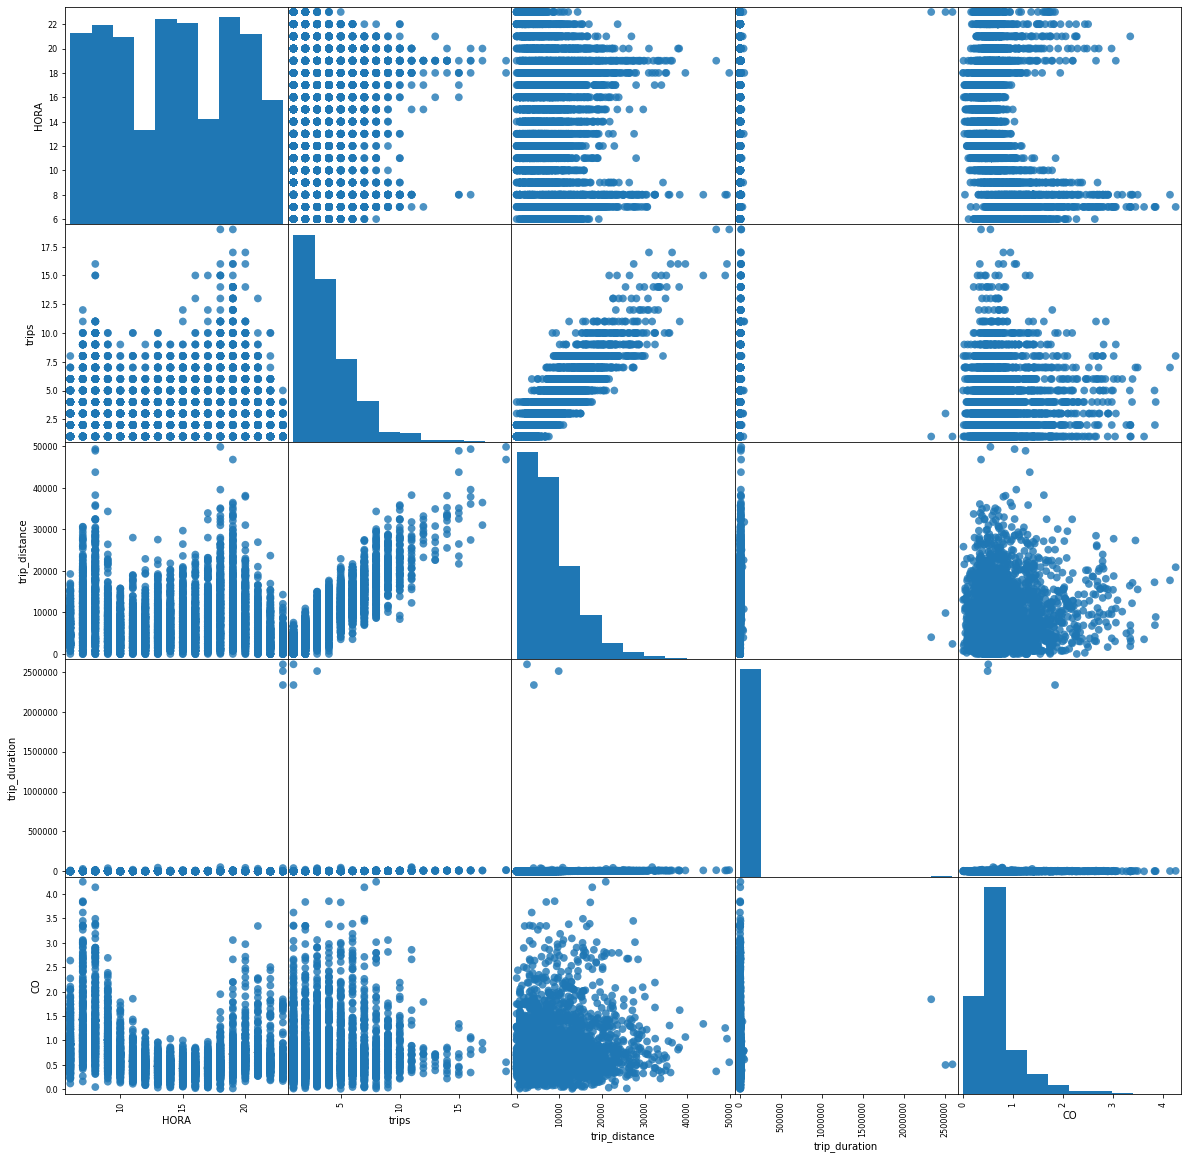

In [ ]:
# bike_station_id top5
df_top5 = df.query('bike_station_id == 266')
df_top5 = df_top5[['HORA', 'trips', 'trip_distance', 'trip_duration', 'CO']]
pd.plotting.scatter_matrix(df_top5, figsize=(20,20), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)
plt.show()

<ipython-input-32-4f869dcef63f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_top5.sort_values(by='trips', ascending=True, inplace=True)


----------------------------------------------------LinearRegression----------------------------------------------------
Coefficients: 
 [ 2.3982865  -2.35084315  2.36923443 -0.44467765]
Mean squared error: 0.18055
Coefficient of determination: 0.11859


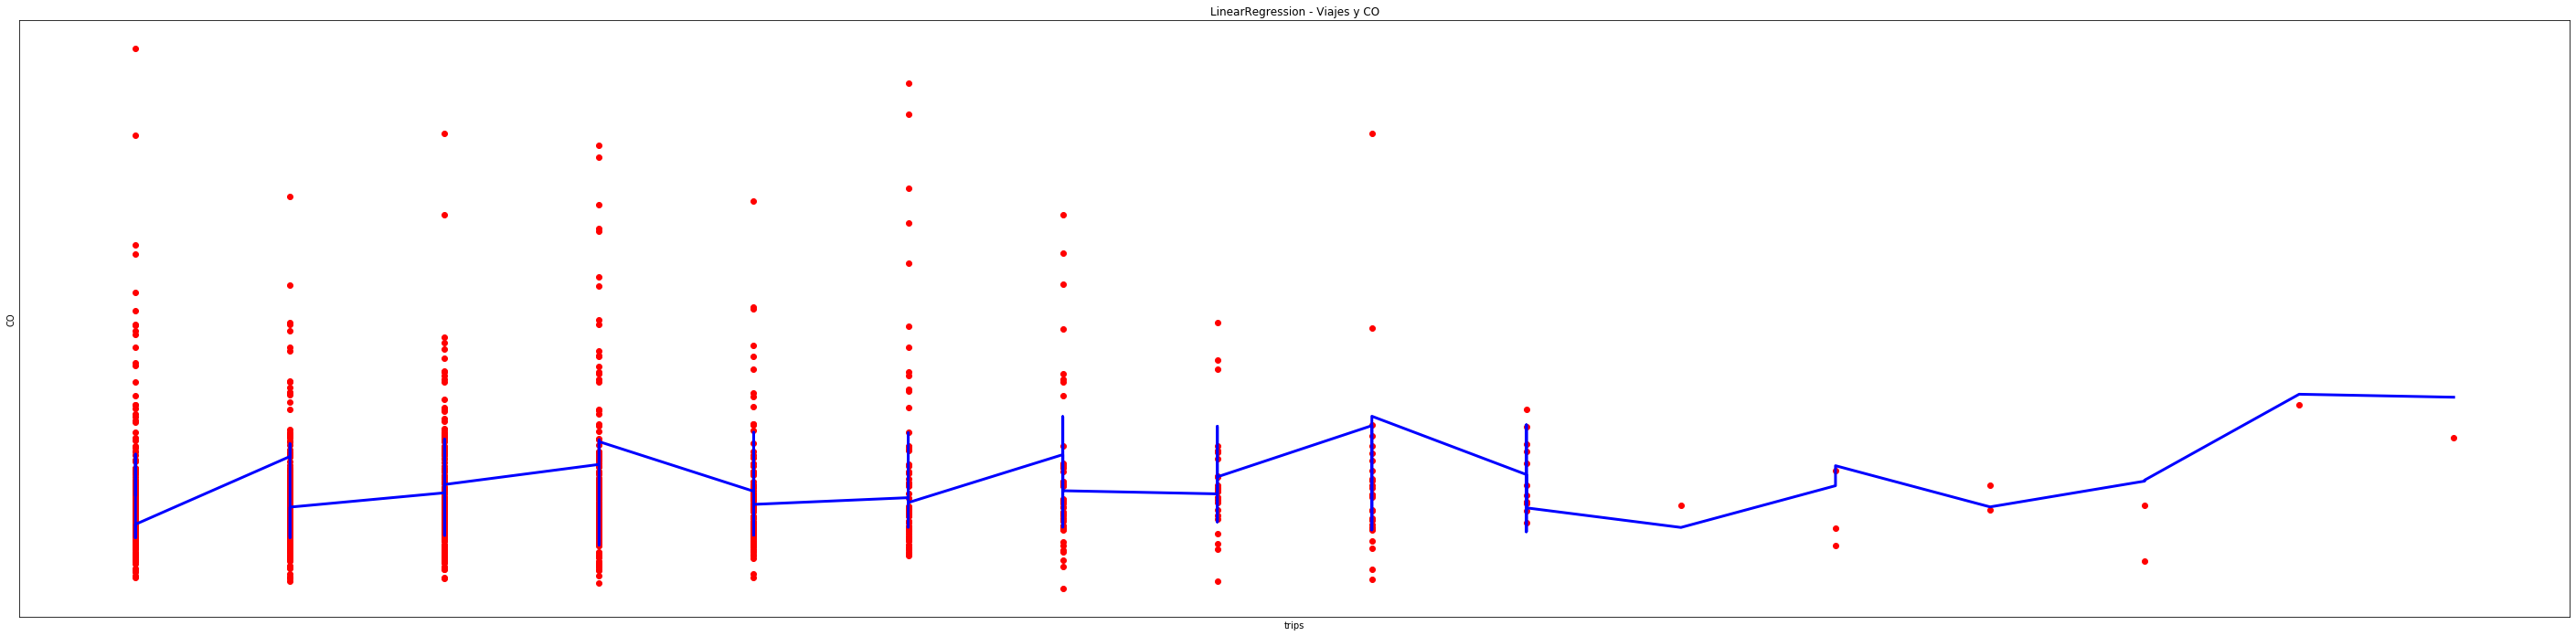

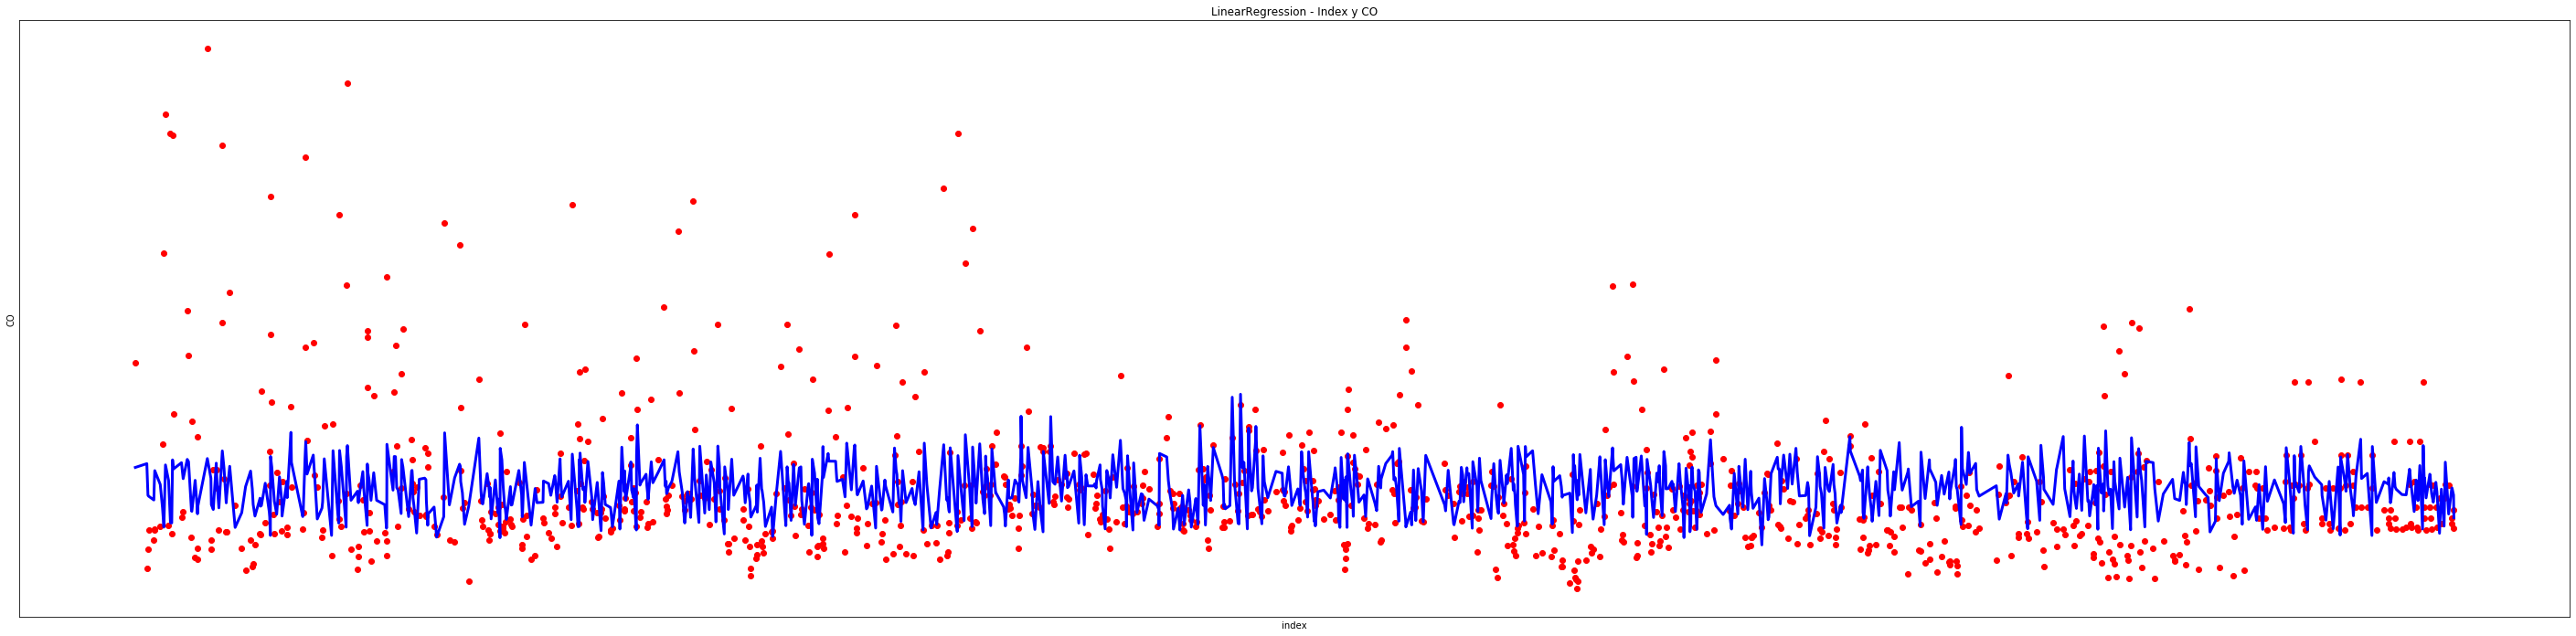

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
Mean squared error: 0.24007
Coefficient of determination: -0.17201


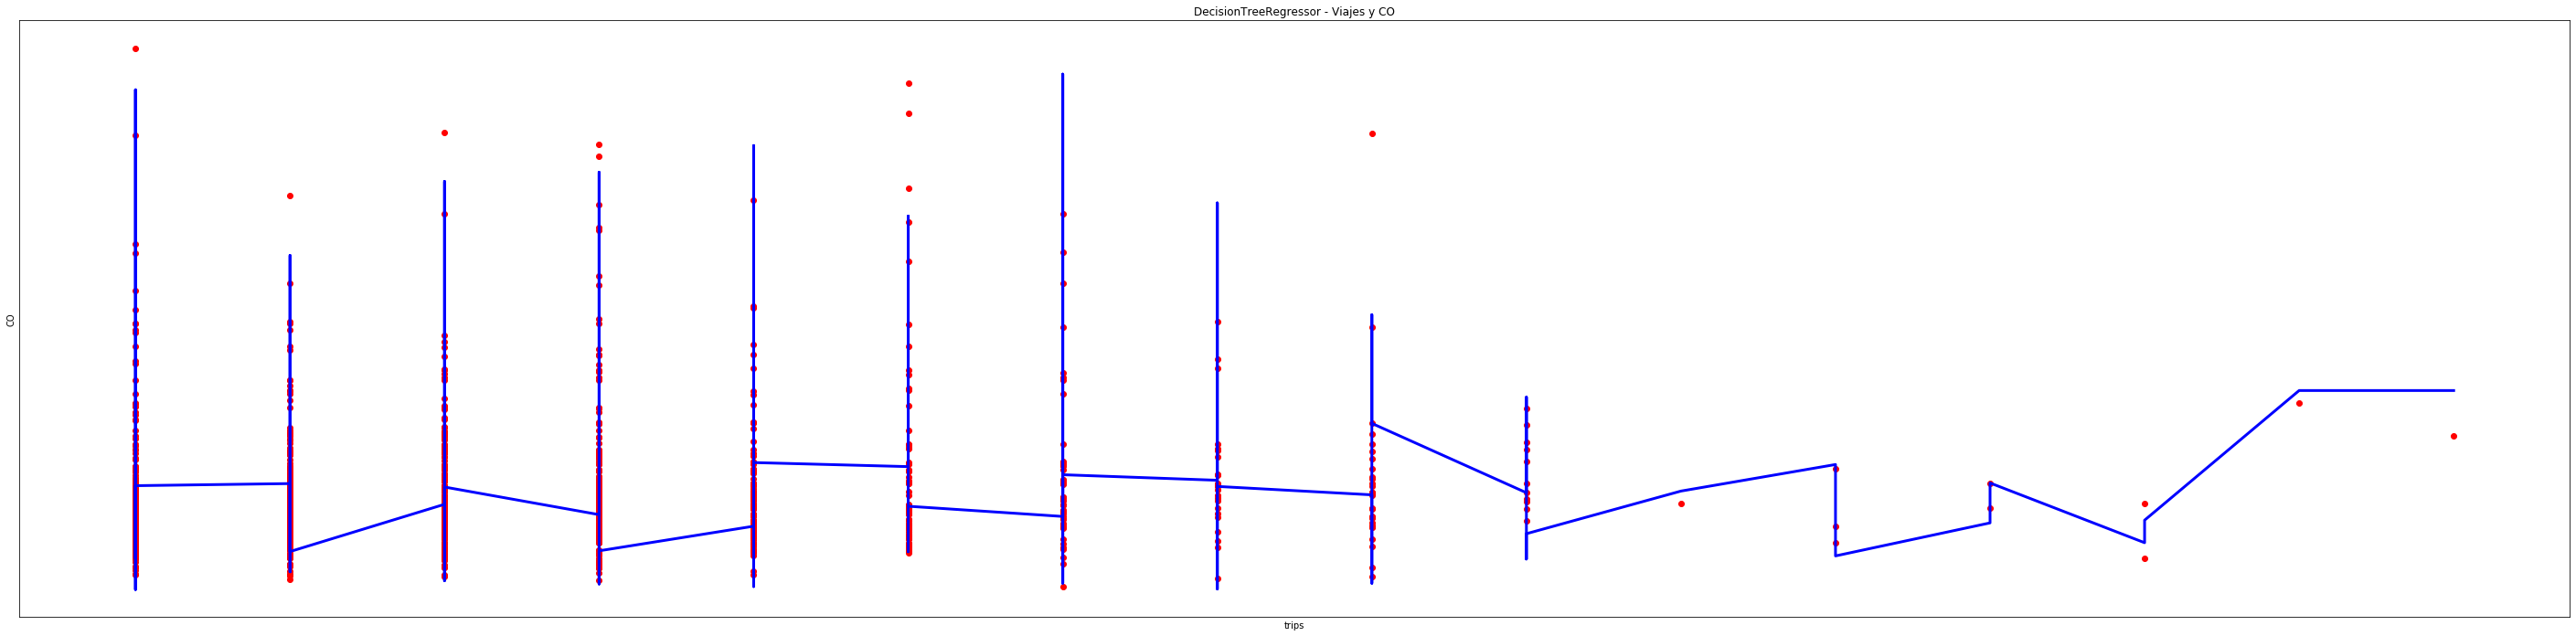

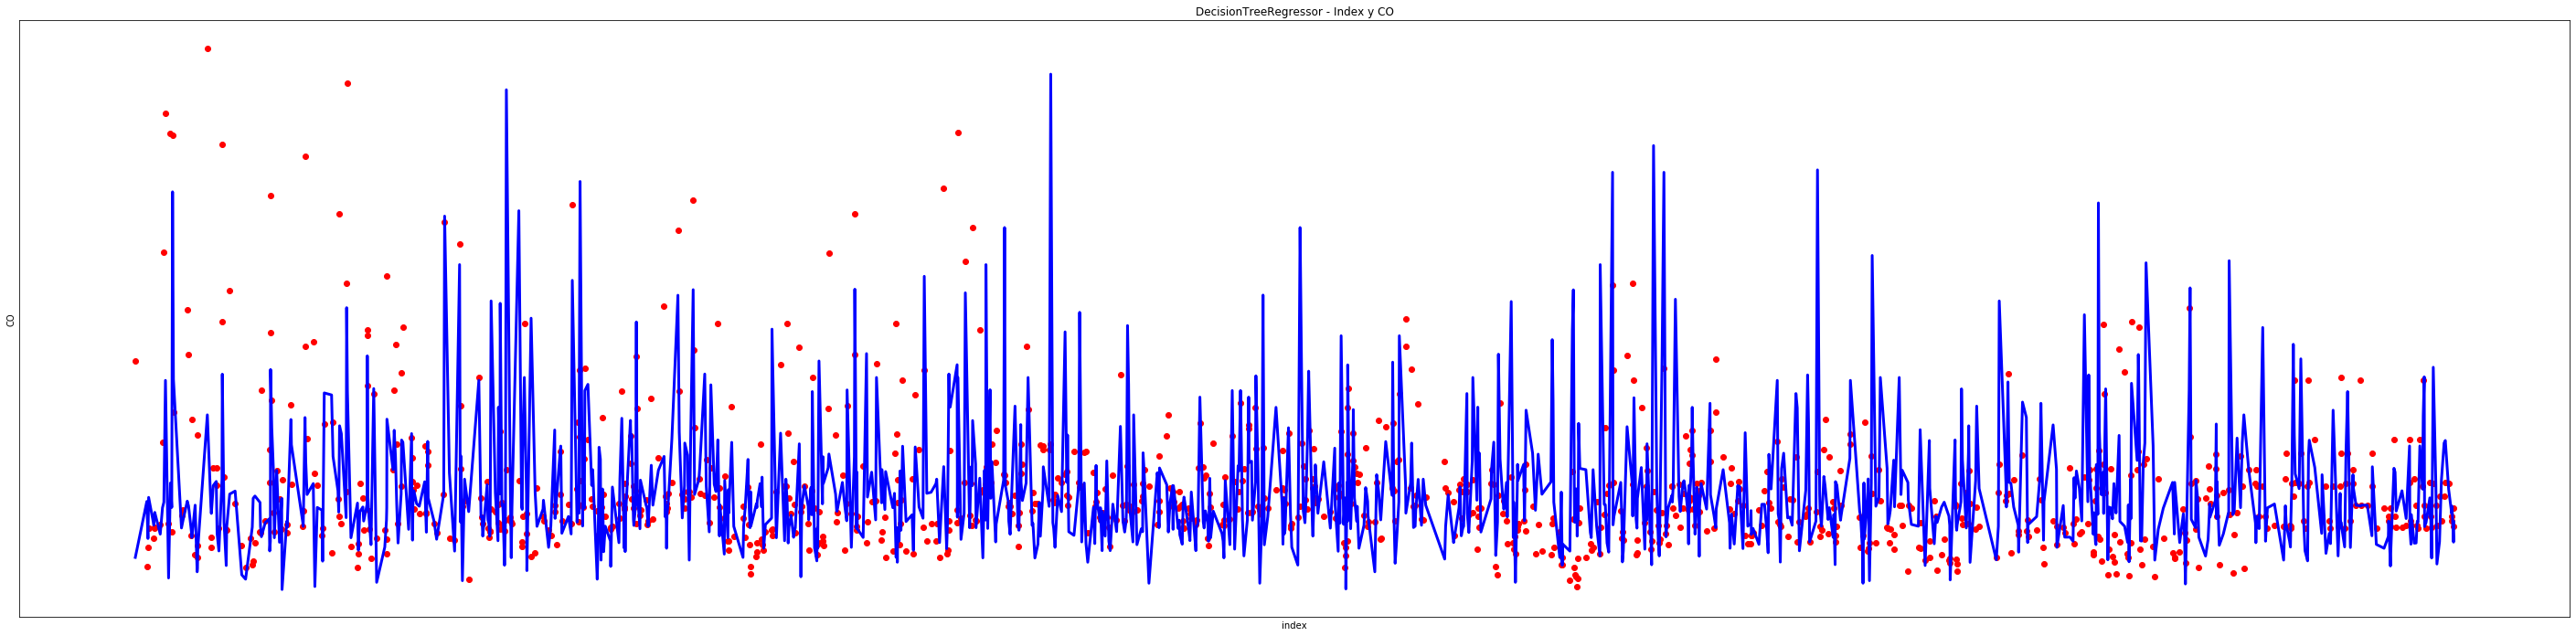

----------------------------------------------------MLPRegressor----------------------------------------------------
Mean squared error: 162.51037
Coefficient of determination: -792.35979


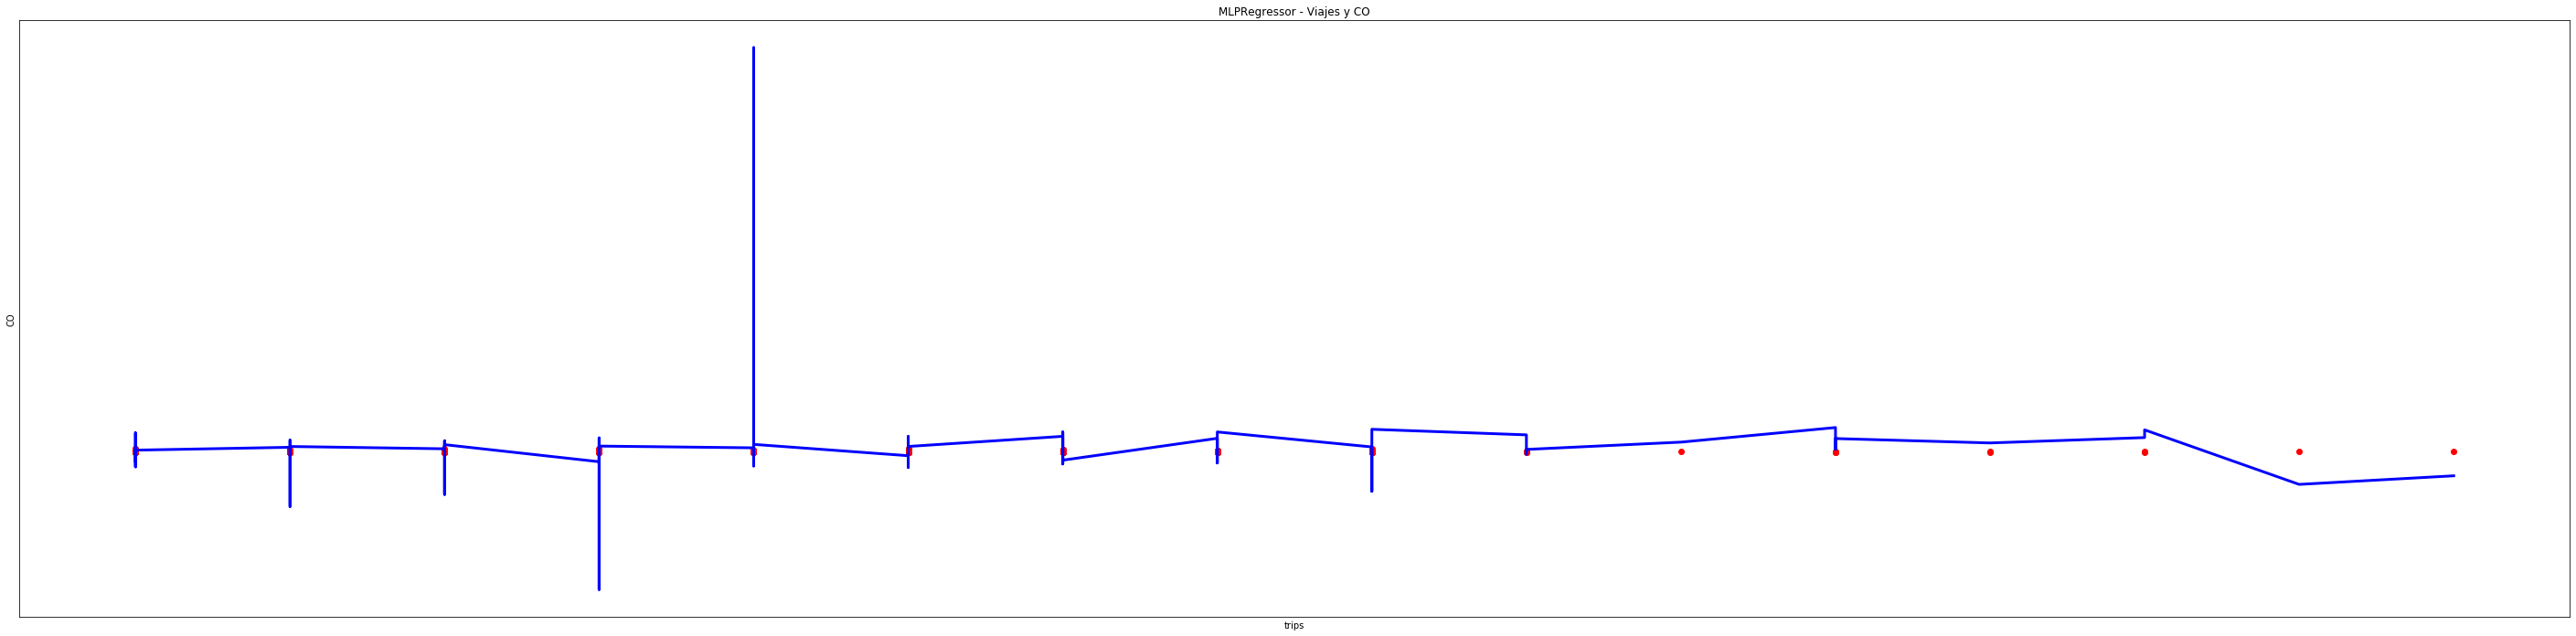

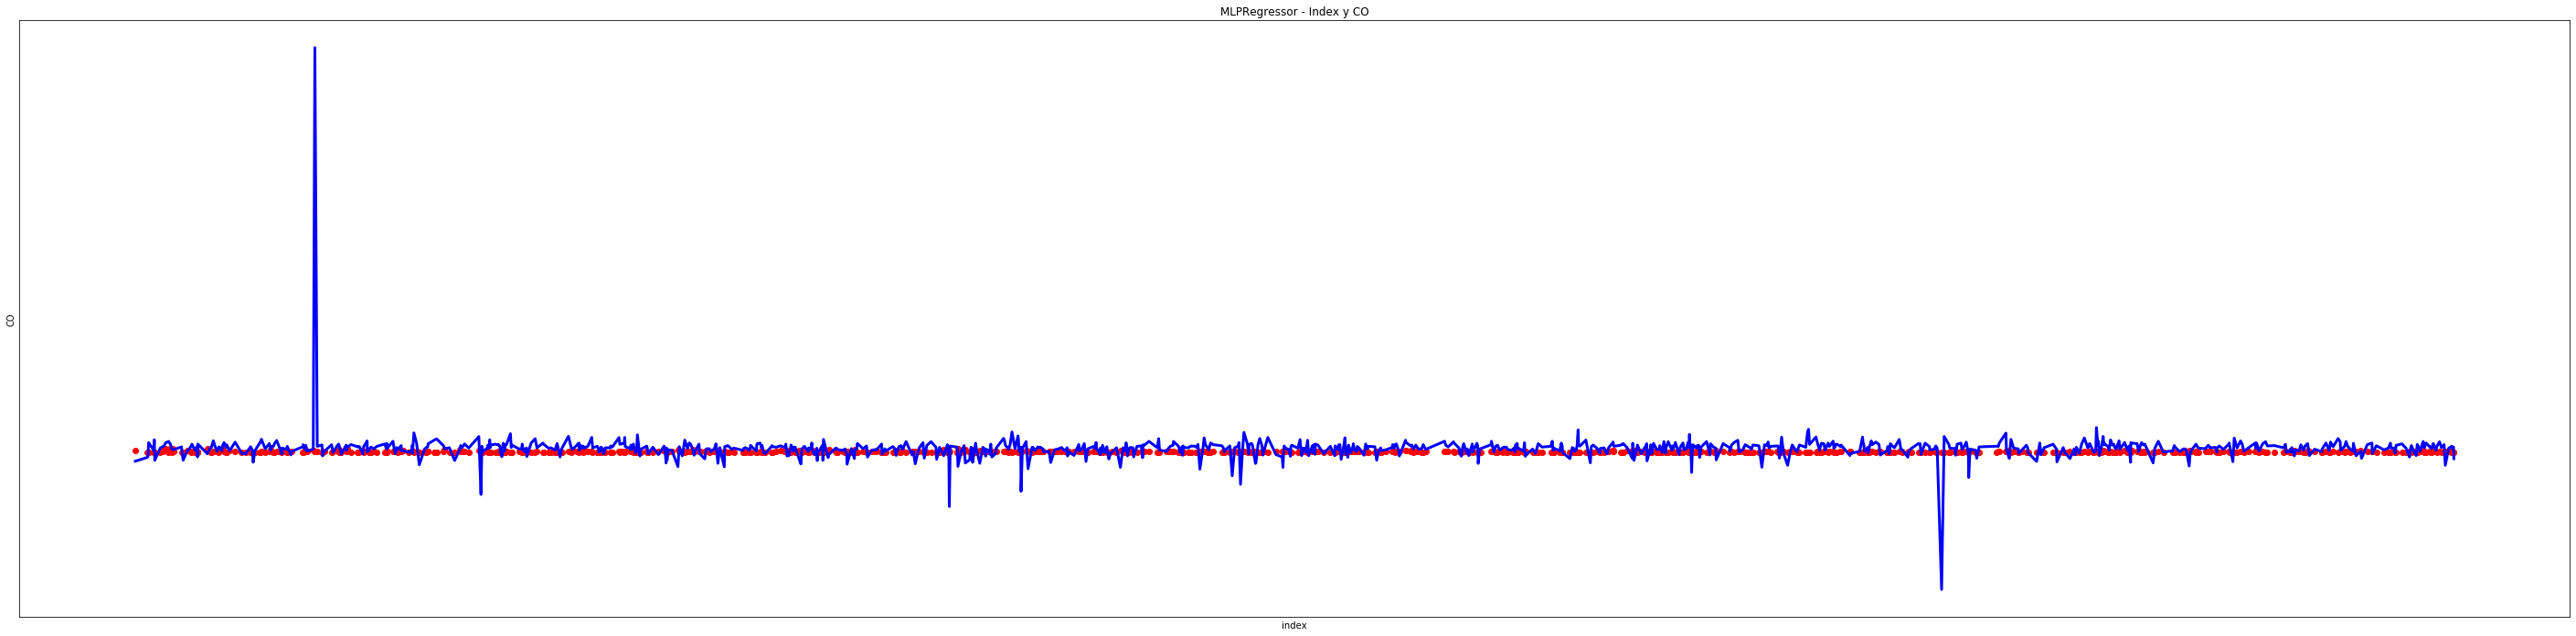

In [ ]:
train_top5, test_top5 = train_test_split(df_top5, test_size=0.2)

models_top5 = []
models_top5.append(('LinearRegression', linear_model.LinearRegression()))
models_top5.append(('DecisionTreeRegressor', DecisionTreeRegressor(random_state=0)))
models_top5.append(('MLPRegressor', MLPRegressor(random_state=1, max_iter=500)))
results = []
names = []
for name, model in models_top5:
    test_top5.sort_values(by='trips', ascending=True, inplace=True)
    model.fit(train_top5.drop('CO', axis=1), train_top5['CO'])
    y_pred = model.predict(test_top5.drop('CO', axis=1))

    print(f'----------------------------------------------------{name}----------------------------------------------------')
    if(name == 'LinearRegression'):
      print('Coefficients: \n', regr.coef_)
    print('Mean squared error: %.5f'
          % mean_squared_error(test_top5['CO'], y_pred))
    print('Coefficient of determination: %.5f'
          % r2_score(test_top5['CO'], y_pred))
    
    plt.scatter(test_top5['trips'], test_top5['CO'],  color='red')
    plt.plot(test_top5['trips'], y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('trips')
    plt.ylabel('CO')
    plt.title(name + ' - Viajes y CO')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

    test_top5 = test_top5.sort_index(axis = 0) 
    y_pred = model.predict(test_top5.drop('CO', axis=1))
    # Plot outputs
    plt.scatter(test_top5.index, test_top5['CO'],  color='red')
    plt.plot(test_top5.index, y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('index')
    plt.ylabel('CO')
    plt.title(name + ' - Index y CO')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()